# Measuring Pineapple Juice Impact on Quantitative MRI Liver Metrics



In [1]:
# Get Current directory, if not change to the main directory
import os
if os.getcwd() != '/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice':
    os.chdir('/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice')
print('All required data for this project can be found at:', os.getcwd())

# How this report was generated
print('This report was generated with `jupyter nbconvert --to pdf --no-input VendorSpecificPlots.ipynb` command.')

#Adding time stamp for periodic output
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')
print('Late Update:', today)

All required data for this project can be found at: /Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice
This report was generated with `jupyter nbconvert --to pdf --no-input VendorSpecificPlots.ipynb` command.
Late Update: 2022-04-26


#### Data Specification:
`post` and `pre` folder contain the LMSDiscoverv5 automatic output report files. This was done by Joao\
`Pineapple juice effect.csv` contains the **manual collection** of Portal IDs from Perspectum Portal. This was done by matching the experiment number EXP010; and **manual collection** of metric values was done by going into each report to record them. It had 40 participants data.\
`PJdataframe.csv` contains the 1st phase analysis in which scanner field strength, scanner model and vendor information were not defined. It has 30 participants data.\
`FinalDf.csv` contains the 2nd phase analysis where field strength specific information were further collected by `OrgData.py`. It had 40 participants data.

#### Analysis Specification:
`PineappleJuiceScript.py` was the analysis for combined data plots, and statistical analysis. It was output to pythone file from `GatherPlot.ipynb`
`OrgData.py` was used to automatically retrieve values from reports in `pre` and `post` folders to generate `FinalDf.csv`\
`VendorSpecificPlots.ipynb` was used on `FinalDf.csv` and plot out field-strength specific plots and descriptive statistics\
Further analysis is done for the metric R1 due to the phenomena that changes in T1 correlate with initial T1 however changes in R1 (reciprocal of T1) do not correlate with initial R1.

Note that it should actually be field-strength specific because these participants were scanned with Siemens scanners but on 1.5T Avantofit and 3T Prisma, not different vendors


In [2]:
# Import libraries
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy
from scipy import stats
import numpy as np
import dataframe_image as dfi
import statsmodels.api as sm

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Cleaning

In [4]:
file = "/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice/FinalDF.csv"
read_file = pd.read_csv(file, delimiter = ",", header= 0)
#read_file

In [5]:
read_file.columns = ['Unnamed: 0', 'Record Id', 'Age', 'BMI', 'Condition',
       'Portal ID (Pre PJ)', 'EXP number (Pre PJ)', 'cT1 median (Pre PJ)',
       'Iron median (Pre PJ)', 'PDFF median (Pre PJ)', 'cT1 Q1 (Pre PJ)',
       'cT1 Q3 (Pre PJ)', 'Iron Q1 (Pre PJ)', 'Iron Q3 (Pre PJ)',
       'PDFF Q1 (Pre PJ)', 'PDFF Q3 (Pre PJ)', 'cT1 Ref Upper',
       'cT1 Ref Lower', 'Iron Ref', 'PDFF Ref', 'Vendor model',
       'Field strength', 'Portal ID (Post PJ)',
       'EXP number (Post PJ)', 'cT1 median (Post PJ)', 'Iron median (Post PJ)',
       'PDFF median (Post PJ)', 'cT1 Q1 (Post PJ)', 'cT1 Q3 (Post PJ)',
       'Iron Q1 (Post PJ)', 'Iron Q3 (Post PJ)', 'PDFF Q1 (Post PJ)',
       'PDFF Q3 (Post PJ)', 'cT1 Ref Upper1', 'cT1 Ref Lower1', 'Iron Ref1',
       'PDFF Ref1', 'Vendor model (Post PJ)', 'Field strength (Post PJ)']

In [6]:
# See the detail of the dataframe 'read_file'
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                40 non-null     int64  
 1   Record Id                 40 non-null     object 
 2   Age                       20 non-null     float64
 3   BMI                       20 non-null     float64
 4   Condition                 40 non-null     object 
 5   Portal ID (Pre PJ)        40 non-null     object 
 6   EXP number (Pre PJ)       31 non-null     object 
 7   cT1 median (Pre PJ)       31 non-null     float64
 8   Iron median (Pre PJ)      31 non-null     float64
 9   PDFF median (Pre PJ)      31 non-null     float64
 10  cT1 Q1 (Pre PJ)           31 non-null     float64
 11  cT1 Q3 (Pre PJ)           31 non-null     float64
 12  Iron Q1 (Pre PJ)          31 non-null     float64
 13  Iron Q3 (Pre PJ)          31 non-null     float64
 14  PDFF Q1 (Pre

In [7]:
# drop the NaN columns
drop_columns = read_file.drop(labels = None, axis = 1, columns = ['Unnamed: 0','Portal ID (Pre PJ)', 'cT1 Ref Upper1', 'cT1 Ref Lower1', 'Iron Ref1', 'PDFF Ref1', 'Portal ID (Post PJ)', 'Vendor model (Post PJ)', 'Field strength (Post PJ)']) 
drop_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Record Id              40 non-null     object 
 1   Age                    20 non-null     float64
 2   BMI                    20 non-null     float64
 3   Condition              40 non-null     object 
 4   EXP number (Pre PJ)    31 non-null     object 
 5   cT1 median (Pre PJ)    31 non-null     float64
 6   Iron median (Pre PJ)   31 non-null     float64
 7   PDFF median (Pre PJ)   31 non-null     float64
 8   cT1 Q1 (Pre PJ)        31 non-null     float64
 9   cT1 Q3 (Pre PJ)        31 non-null     float64
 10  Iron Q1 (Pre PJ)       31 non-null     float64
 11  Iron Q3 (Pre PJ)       31 non-null     float64
 12  PDFF Q1 (Pre PJ)       31 non-null     float64
 13  PDFF Q3 (Pre PJ)       31 non-null     float64
 14  cT1 Ref Upper          31 non-null     float64
 15  cT1 Ref 

In [8]:
#drop the rows with NaN  `axis = 0`` means to drop `rows` which contain "any" missing values
drop_row = drop_columns.dropna(axis = 0, how = 'any', subset=['cT1 median (Pre PJ)', 'Iron median (Pre PJ)', 'PDFF median (Pre PJ)', 'cT1 Q1 (Pre PJ)', 'cT1 Q3 (Pre PJ)', 'Iron Q1 (Pre PJ)', 'Iron Q3 (Pre PJ)', 'PDFF Q1 (Pre PJ)', 'PDFF Q3 (Pre PJ)', 'cT1 Ref Upper', 'cT1 Ref Lower', 'Iron Ref', 'PDFF Ref', 'cT1 median (Post PJ)', 'Iron median (Post PJ)', 'PDFF median (Post PJ)', 'cT1 Q1 (Post PJ)', 'cT1 Q3 (Post PJ)', 'Iron Q1 (Post PJ)', 'Iron Q3 (Post PJ)', 'PDFF Q1 (Post PJ)', 'PDFF Q3 (Post PJ)'])
drop_row.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 39
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Record Id              30 non-null     object 
 1   Age                    15 non-null     float64
 2   BMI                    15 non-null     float64
 3   Condition              30 non-null     object 
 4   EXP number (Pre PJ)    30 non-null     object 
 5   cT1 median (Pre PJ)    30 non-null     float64
 6   Iron median (Pre PJ)   30 non-null     float64
 7   PDFF median (Pre PJ)   30 non-null     float64
 8   cT1 Q1 (Pre PJ)        30 non-null     float64
 9   cT1 Q3 (Pre PJ)        30 non-null     float64
 10  Iron Q1 (Pre PJ)       30 non-null     float64
 11  Iron Q3 (Pre PJ)       30 non-null     float64
 12  PDFF Q1 (Pre PJ)       30 non-null     float64
 13  PDFF Q3 (Pre PJ)       30 non-null     float64
 14  cT1 Ref Upper          30 non-null     float64
 15  cT1 Ref 

In [9]:
print('There were in total 10 studies excluded in the analysis procedure due to incomplete data either at the pre PJ ingestion time point or post PJ ingestion timepoint or both. The following table summarise the data that were lost.')
dropped_studies = drop_columns[~drop_columns.index.isin(drop_row.index)]
dropped_studies

There were in total 10 studies excluded in the analysis procedure due to incomplete data either at the pre PJ ingestion time point or post PJ ingestion timepoint or both. The following table summarise the data that were lost.


,Record Id,Age,BMI,Condition,EXP number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1 Ref Upper,cT1 Ref Lower,Iron Ref,PDFF Ref,Vendor model,Field strength,EXP number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ)
10,EXP010_013,36.0,35.20,NAFLD/NASH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXP010pfflayz,835.0,1.4,29.0,786.0,880.0,1.3,1.4,26.0,-31.0
21,EXP010_024,63.0,24.21,PSC Small Duct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXP010qkymcgh,796.0,1.0,1.3,767.0,844.0,0.9,1.1,0.0,2.7
23,EXP010_026,NaN,NaN,Healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXP010qtljicj,821.0,1.2,20.0,790.0,861.0,1.1,1.3,17.0,-22.0
26,EXP010_029,52.0,24.58,NAFLD/NASH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,EXP010_031,NaN,NaN,Healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,EXP010_032,NaN,NaN,Healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,EXP010_040,47.0,26.15,PSC Large Duct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,EXP010_034,58.0,25.62,Haemochromatosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXP010rsvcijr,661.0,1.5,2.4,637.0,700.0,1.2,1.6,0.9,4.7
33,EXP010_036,NaN,NaN,Healthy,EXP010clfrcft,647.0,1.2,2.8,623.0,684.0,1.1,1.2,1.8,3.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,EXP010_038,NaN,NaN,Healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exp010Sasaaiv,737.0,1.0,2.7,711.0,777.0,0.9,1.0,1.7,4.0


# Groupby Field Strength

In [10]:
groupby = [x for _, x in drop_row.groupby('Vendor model')]
AV = groupby[0]
PA = groupby[1]

# Compute cR1

In [11]:
# Compute cR1 for 3T Prisma data
PA['cR1 median (Pre PJ)'] = 1/PA['cT1 median (Pre PJ)']
PA['cR1 median (Post PJ)'] = 1/PA['cT1 median (Post PJ)']
PA

,Record Id,Age,BMI,Condition,EXP number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1 Ref Upper,cT1 Ref Lower,Iron Ref,PDFF Ref,Vendor model,Field strength,EXP number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ)
0,EXP010_002,NaN,NaN,Healthy,EXP010vhobplp,654.0,1.1,4.9,626.0,695.0,1.1,1.2,3.9,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010kfnnfem,698.0,1.2,4.8,668.0,735.0,1.1,1.2,3.8,5.9,0.001529,0.001433
2,EXP010_004,NaN,NaN,Healthy,EXP010vkcrjqc,836.0,1.0,1.9,808.0,881.0,1.0,1.1,1.1,2.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010ooxyfwn,838.0,0.8,1.9,810.0,881.0,0.8,0.8,1.1,2.7,0.001196,0.001193
4,EXP010_006,NaN,NaN,Healthy,EXP010vuvdody,638.0,1.1,3.6,614.0,675.0,1.0,1.2,2.4,4.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010ochlmjx,644.0,1.1,2.6,616.0,678.0,1.1,1.2,1.6,3.8,0.001567,0.001553
6,EXP010_008,NaN,NaN,Healthy,EXP010wktzdls,823.0,0.9,1.6,780.0,861.0,0.9,1.0,0.9,2.4,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010olbctkw,801.0,0.8,2.1,764.0,842.0,0.8,0.9,1.3,3.1,0.001215,0.001248
8,EXP010_011,34.0,35.92,NAFLD/NASH,EXP010wlnocav,962.0,1.3,21.0,883.0,103.0,1.3,1.4,20.0,-23.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010oyklrkq,983.0,1.4,21.0,917.0,104.0,1.3,1.4,19.0,-22.0,0.001040,0.001017
9,EXP010_012,61.0,27.73,PBC,EXP010wrtonqh,688.0,1.0,3.4,664.0,722.0,1.0,1.0,1.5,5.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010pzugyag,717.0,1.0,2.0,692.0,749.0,1.0,1.0,0.9,3.3,0.001453,0.001395
11,EXP010_014,NaN,NaN,Healthy,EXP010xresjqh,712.0,1.0,3.1,683.0,753.0,0.9,1.2,1.9,4.5,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010pbukhnp,695.0,1.0,2.9,668.0,732.0,1.0,1.1,1.9,4.2,0.001404,0.001439
12,EXP010_015,NaN,NaN,Healthy,EXP010xukgukr,684.0,1.0,2.6,660.0,719.0,1.0,1.1,1.5,3.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010pgarsgq,732.0,1.2,4.2,700.0,770.0,1.0,1.3,2.6,5.7,0.001462,0.001366
16,EXP010_019,57.0,27.99,NAFLD/NASH,EXP010xsnkfaa,637.0,2.5,4.6,604.0,711.0,2.3,2.7,3.2,6.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010pyrnfmw,649.0,2.7,4.2,614.0,723.0,2.2,2.9,2.7,5.8,0.001570,0.001541
17,EXP010_020,NaN,NaN,Healthy,EXP010xyhlgie,742.0,1.0,3.8,717.0,777.0,0.9,1.0,2.6,4.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010qgnaouz,748.0,0.9,3.7,723.0,783.0,0.8,0.9,2.7,4.8,0.001348,0.001337


In [12]:
# Compute cR1 for 1.5T Avantofit data
AV['cR1 median (Pre PJ)'] = 1/AV['cT1 median (Pre PJ)']
AV['cR1 median (Post PJ)'] = 1/AV['cT1 median (Post PJ)']
AV

,Record Id,Age,BMI,Condition,EXP number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1 Ref Upper,cT1 Ref Lower,Iron Ref,PDFF Ref,Vendor model,Field strength,EXP number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ)
1,EXP010_003,25.0,22.02,Haemochromatosis,EXP010vetygxw,667.0,1.1,6.1,643.0,701.0,1.1,1.2,4.7,7.5,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,EXP010nzjwutv,661.0,1.0,5.5,640.0,696.0,1.0,1.1,4.1,7.0,0.001499,0.001513
3,EXP010_005,NaN,NaN,Healthy,EXP010vpitawu,826.0,1.0,1.2,793.0,875.0,0.9,1.1,0.1,2.4,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,EXP010otlxkrz,816.0,1.0,1.6,786.0,867.0,0.9,1.0,0.4,3.1,0.001211,0.001225
5,EXP010_007,NaN,NaN,Healthy,EXP010woaclvx,658.0,1.1,1.3,633.0,699.0,1.0,1.1,0.0,2.8,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,EXP010ogwfklv,653.0,1.1,1.3,632.0,688.0,1.0,1.1,0.0,2.7,0.001520,0.001531
7,EXP010_009,NaN,NaN,Healthy,EXP010waxoiey,615.0,1.3,1.7,597.0,652.0,1.2,1.3,0.2,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,EXP010opqcxxj,621.0,1.4,1.6,600.0,656.0,1.3,1.5,0.0,3.1,0.001626,0.001610
13,EXP010_016,50.0,20.65,PBC,EXP010xcidtzf,685.0,1.1,2.3,662.0,722.0,1.0,1.1,0.6,4.4,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,EXP010pkplxry,710.0,1.0,1.9,684.0,753.0,0.9,1.0,0.4,3.8,0.001460,0.001408
14,EXP010_017,30.0,26.74,PSC Small Duct,EXP010xhwjezc,666.0,1.2,1.0,646.0,699.0,1.2,1.3,0.0,2.2,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,EXP010ppzojig,680.0,1.1,1.1,661.0,711.0,1.1,1.1,0.0,2.4,0.001502,0.001471
15,EXP010_018,NaN,NaN,Healthy,EXP010xnqqfxi,733.0,1.1,1.3,710.0,766.0,1.1,1.2,0.1,2.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,EXP010ptkyvkf,753.0,1.1,1.2,732.0,785.0,1.1,1.1,0.0,2.7,0.001364,0.001328
20,EXP010_023,NaN,NaN,Healthy,EXP010yeubkrf,727.0,0.9,2.4,700.0,767.0,0.9,1.0,1.1,3.9,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,EXP010qfsrhca,735.0,0.9,2.2,711.0,778.0,0.9,1.0,0.8,3.7,0.001376,0.001361
22,EXP010_025,65.0,25.28,PSC Small Duct,EXP010ypjqucg,693.0,1.1,5.0,667.0,725.0,1.1,1.2,3.5,6.6,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,EXP010qopnvaq,725.0,1.1,4.8,701.0,762.0,1.0,1.2,3.4,6.4,0.001443,0.001379
27,EXP010_030,39.0,28.66,NAFLD/NASH,Exp010Zgntdcr,792.0,1.2,17.0,759.0,836.0,1.2,1.3,15.0,-19.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,Exp010Raztyee,804.0,1.3,17.0,770.0,847.0,1.2,1.3,15.0,-19.0,0.001263,0.001244


In [13]:
print('The information of cR1 was derived from taking direct reciprocal from the cT1 value. The reason of deriving this value it to address the fact that in literature, initial T1 was found to correlate with delta T1(change in T1). However this phenomena was not found in R1 values. Please refer to Bluemke, E, Stride, E, Bulte, DP. A simplified empirical model to estimate oxygen relaxivity at different magnetic fields. NMR in Biomedicine. 2022; 35( 2):e4625. doi:10.1002/nbm.4625 for more information.')

The information of cR1 was derived from taking direct reciprocal from the cT1 value. The reason of deriving this value it to address the fact that in literature, initial T1 was found to correlate with delta T1(change in T1). However this phenomena was not found in R1 values. Please refer to Bluemke, E, Stride, E, Bulte, DP. A simplified empirical model to estimate oxygen relaxivity at different magnetic fields. NMR in Biomedicine. 2022; 35( 2):e4625. doi:10.1002/nbm.4625 for more information.


# Descriptive Statistics

In [14]:
# Descriptive Statistics for 1.5T data and exclude numeric columns 
PA_des_Nomi = PA.describe(exclude=[np.number]) # Describe nominal data (used to label variables without any quantitative value)
record_entry = ', '.join(list(PA_des_Nomi.columns))

print('There are some parameters are categorical or nominal data:', record_entry, '. The count and unique in the descriptive statistics table below indicated that there were', PA_des_Nomi['Record Id']['count'], 'participants being scanned with', PA_des_Nomi['Vendor model']['top'], PA_des_Nomi['Field strength']['top'], 'scanner and each of them provide unique value. Meaning each participant had their unique entry meaning that no one was scanned twice at either of the given timepoint(before/after PJ).')
PA_des_Nomi

There are some parameters are categorical or nominal data: Record Id, Condition, EXP number (Pre PJ), Vendor model, Field strength, EXP number (Post PJ) . The count and unique in the descriptive statistics table below indicated that there were 17 participants being scanned with SIEMENSPrisma 3T scanner and each of them provide unique value. Meaning each participant had their unique entry meaning that no one was scanned twice at either of the given timepoint(before/after PJ).


,Record Id,Condition,EXP number (Pre PJ),Vendor model,Field strength,EXP number (Post PJ)
count,17,17,17,17,17,17
unique,17,7,17,1,1,17
top,EXP010_021,Healthy,EXP010yztnezr,SIEMENSPrisma,3T,Exp010Sfjpmad
freq,1,9,1,17,17,1


In [15]:
# Descriptive Statistics for 1.5T data and exclude numeric columns 
AV_des_Nomi = AV.describe(exclude=[np.number])
record_entry = ', '.join(list(AV_des_Nomi.columns))

print('There are some parameters are categorical or nominal data:', record_entry, '. The count and unique in the descriptive statistics table below indicated that there were', AV_des_Nomi['Record Id']['count'], 'participants scanned with', AV_des_Nomi['Vendor model']['top'], AV_des_Nomi['Field strength']['top'],'scanner and each of them provide unique value. Meaning each participant had their unique entry meaning that no one was scanned twice at either of the given timepoint(before/after PJ).')
AV_des_Nomi

There are some parameters are categorical or nominal data: Record Id, Condition, EXP number (Pre PJ), Vendor model, Field strength, EXP number (Post PJ) . The count and unique in the descriptive statistics table below indicated that there were 13 participants scanned with SIEMENSAvanto_ﬁt 1.5T scanner and each of them provide unique value. Meaning each participant had their unique entry meaning that no one was scanned twice at either of the given timepoint(before/after PJ).


,Record Id,Condition,EXP number (Pre PJ),Vendor model,Field strength,EXP number (Post PJ)
count,13,13,13,13,13,13
unique,13,5,13,1,1,13
top,EXP010_007,Healthy,EXP010waxoiey,SIEMENSAvanto_ﬁt,1.5T,EXP010opqcxxj
freq,1,6,1,13,13,1


In [16]:
# Descriptive Statistics for 3T data. the include='all' argument includes all datatype: numeric, object, categorical, datetime
PA_des = PA.describe().round(1) # Include/exclude: None (default) : The result will include all numeric columns.

# Decribe table
print('The table below showed the descriptive statistics of the numerical data for the', PA_des_Nomi['Vendor model']['top'], PA_des_Nomi['Field strength']['top'],'dataset.')

# describe cT1
print('The population mean value of median cT1 before pineapple juice ingestion is',  PA_des['cT1 median (Pre PJ)']['mean'], '(ms) while the population median value of median cT1 before pineapple juice ingestion is', PA_des['cT1 median (Pre PJ)']['50%'],'(ms). In the case of after pineapple juice ingestion, the population mean value of median cT1 is',  PA_des['cT1 median (Post PJ)']['mean'], '(ms) and population median value of median cT1 is', PA_des['cT1 median (Post PJ)']['50%'],'(ms).')

# describe Iron
print('The population mean value of median Iron before pineapple juice ingestion is',  PA_des['Iron median (Pre PJ)']['mean'], '(mg/g dry liver) while the population median value of median Iron before pineapple juice ingestion is', PA_des['Iron median (Pre PJ)']['50%'],'(mg/g dry liver). In the case of after pineapple juice ingestion, the population mean value of median Iron is',  PA_des['Iron median (Post PJ)']['mean'], '(mg/g dry liver) and population median value of median Iron is', PA_des['Iron median (Post PJ)']['50%'],'(mg/g dry liver); suggesting there is no difference between Iron(Pre PJ) and Iron(Post PJ)')

# describe PDFF
print('The population mean value of median PDFF before pineapple juice ingestion is',  PA_des['PDFF median (Pre PJ)']['mean'], '(%) while the population median value of median PDFF before pineapple juice ingestion is', PA_des['PDFF median (Pre PJ)']['50%'],'(%). In the case of after pineapple juice ingestion, the population mean value of median PDFF is',  PA_des['PDFF median (Post PJ)']['mean'], '(%) and population median value of median PDFF is', PA_des['PDFF median (Post PJ)']['50%'],'(%).')
PA_des

The table below showed the descriptive statistics of the numerical data for the SIEMENSPrisma 3T dataset.
The population mean value of median cT1 before pineapple juice ingestion is 736.9 (ms) while the population median value of median cT1 before pineapple juice ingestion is 727.0 (ms). In the case of after pineapple juice ingestion, the population mean value of median cT1 is 756.2 (ms) and population median value of median cT1 is 753.0 (ms).
The population mean value of median Iron before pineapple juice ingestion is 1.1 (mg/g dry liver) while the population median value of median Iron before pineapple juice ingestion is 1.0 (mg/g dry liver). In the case of after pineapple juice ingestion, the population mean value of median Iron is 1.1 (mg/g dry liver) and population median value of median Iron is 1.0 (mg/g dry liver); suggesting there is no difference between Iron(Pre PJ) and Iron(Post PJ)
The population mean value of median PDFF before pineapple juice ingestion is 4.1 (%) while th

,Age,BMI,cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1 Ref Upper,cT1 Ref Lower,Iron Ref,PDFF Ref,cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ)
count,8.0,8.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
mean,45.0,26.9,736.9,1.1,4.1,705.1,725.0,1.0,1.2,3.0,2.7,633.0,794.0,1.8,5.6,756.2,1.1,3.9,724.3,743.5,1.0,1.2,2.8,2.4,0.0,0.0
std,15.8,4.9,81.6,0.4,4.4,71.8,169.8,0.4,0.4,4.4,6.7,0.0,0.0,0.0,0.0,79.8,0.4,4.5,72.9,173.3,0.3,0.5,4.3,6.4,0.0,0.0
min,21.0,20.5,637.0,0.8,1.6,604.0,103.0,0.7,0.8,0.9,-23.0,633.0,794.0,1.8,5.6,644.0,0.8,1.5,614.0,104.0,0.7,0.8,0.4,-22.0,0.0,0.0
25%,34.0,23.9,684.0,1.0,2.6,660.0,713.0,0.9,1.0,1.5,3.3,633.0,794.0,1.8,5.6,698.0,0.9,2.1,670.0,732.0,0.8,0.9,1.3,3.0,0.0,0.0
50%,43.0,27.8,727.0,1.0,3.1,701.0,759.0,1.0,1.1,1.9,4.2,633.0,794.0,1.8,5.6,753.0,1.0,2.6,723.0,783.0,1.0,1.1,1.8,3.4,0.0,0.0
75%,58.0,28.3,761.0,1.1,3.6,735.0,795.0,1.0,1.2,2.4,4.9,633.0,794.0,1.8,5.6,796.0,1.1,3.7,760.0,820.0,1.0,1.2,2.6,4.8,0.0,0.0
max,67.0,35.9,962.0,2.5,21.0,883.0,881.0,2.3,2.7,20.0,6.0,633.0,794.0,1.8,5.6,983.0,2.7,21.0,917.0,881.0,2.2,2.9,19.0,5.9,0.0,0.0


In [17]:
AV_des = AV.describe().round(1)

# Decribe table
print('The table below showed the descriptive statistics of the numerical data for the', AV_des_Nomi['Vendor model']['top'], AV_des_Nomi['Field strength']['top'],'dataset.')

# describe cT1
print('The population mean value of median cT1 before pineapple juice ingestion is',  AV_des['cT1 median (Pre PJ)']['mean'], '(ms) while the population median value of median cT1 before pineapple juice ingestion is', AV_des['cT1 median (Pre PJ)']['50%'],'(ms). In the case of after pineapple juice ingestion, the population mean value of median cT1 is',  AV_des['cT1 median (Post PJ)']['mean'], '(ms) and population median value of median cT1 is', AV_des['cT1 median (Post PJ)']['50%'],'(ms).')

# describe Iron
print('The population mean value of median Iron before pineapple juice ingestion is',  AV_des['Iron median (Pre PJ)']['mean'], '(mg/g dry liver) while the population median value of median Iron before pineapple juice ingestion is', AV_des['Iron median (Pre PJ)']['50%'],'(mg/g dry liver). In the case of after pineapple juice ingestion, the population mean value of median Iron is',  AV_des['Iron median (Post PJ)']['mean'], '(mg/g dry liver) and population median value of median Iron is', AV_des['Iron median (Post PJ)']['50%'],'(mg/g dry liver); suggesting there is no difference between Iron(Pre PJ) and Iron(Post PJ)')

# describe PDFF
print('The population mean value of median PDFF before pineapple juice ingestion is',  AV_des['PDFF median (Pre PJ)']['mean'], '(%) while the population median value of median PDFF before pineapple juice ingestion is', AV_des['PDFF median (Pre PJ)']['50%'],'(%). In the case of after pineapple juice ingestion, the population mean value of median PDFF is',  AV_des['PDFF median (Post PJ)']['mean'], '(%) and population median value of median PDFF is', AV_des['PDFF median (Post PJ)']['50%'],'(%).')
AV_des

The table below showed the descriptive statistics of the numerical data for the SIEMENSAvanto_ﬁt 1.5T dataset.
The population mean value of median cT1 before pineapple juice ingestion is 709.5 (ms) while the population median value of median cT1 before pineapple juice ingestion is 693.0 (ms). In the case of after pineapple juice ingestion, the population mean value of median cT1 is 718.9 (ms) and population median value of median cT1 is 725.0 (ms).
The population mean value of median Iron before pineapple juice ingestion is 1.1 (mg/g dry liver) while the population median value of median Iron before pineapple juice ingestion is 1.1 (mg/g dry liver). In the case of after pineapple juice ingestion, the population mean value of median Iron is 1.1 (mg/g dry liver) and population median value of median Iron is 1.1 (mg/g dry liver); suggesting there is no difference between Iron(Pre PJ) and Iron(Post PJ)
The population mean value of median PDFF before pineapple juice ingestion is 3.8 (%) whi

,Age,BMI,cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1 Ref Upper,cT1 Ref Lower,Iron Ref,PDFF Ref,cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ)
count,7.0,7.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
mean,45.9,26.9,709.5,1.1,3.8,684.4,747.4,1.1,1.2,2.3,2.5,633.0,794.0,1.8,5.6,718.9,1.1,3.6,694.8,756.5,1.0,1.1,2.2,2.3,0.0,0.0
std,14.9,6.1,58.2,0.1,4.4,54.2,61.7,0.1,0.1,4.2,6.7,0.0,0.0,0.0,0.0,57.6,0.1,4.4,54.4,61.5,0.1,0.1,4.2,6.6,0.0,0.0
min,25.0,20.6,615.0,0.9,1.0,597.0,652.0,0.9,1.0,0.0,-19.0,633.0,794.0,1.8,5.6,621.0,0.9,1.1,600.0,656.0,0.9,1.0,0.0,-19.0,0.0,0.0
25%,34.5,23.6,667.0,1.1,1.3,646.0,701.0,1.0,1.1,0.0,2.7,633.0,794.0,1.8,5.6,680.0,1.0,1.3,661.0,711.0,1.0,1.1,0.0,2.7,0.0,0.0
50%,50.0,25.9,693.0,1.1,1.7,667.0,725.0,1.1,1.2,0.2,3.1,633.0,794.0,1.8,5.6,725.0,1.1,1.6,701.0,762.0,1.0,1.1,0.4,3.1,0.0,0.0
75%,56.0,27.7,742.0,1.2,5.0,714.0,778.0,1.1,1.2,3.5,4.4,633.0,794.0,1.8,5.6,753.0,1.1,4.8,732.0,785.0,1.1,1.2,3.4,4.0,0.0,0.0
max,65.0,39.2,826.0,1.3,17.0,793.0,875.0,1.2,1.3,15.0,8.0,633.0,794.0,1.8,5.6,816.0,1.4,17.0,786.0,867.0,1.3,1.5,15.0,7.7,0.0,0.0


# Explore Distribution

### Box Plot

There was a outlier in the cR1 metric for the 3T Prisma Pre PJ group. From visual point of view, cT1 and cR1 groups follow close to normal distribution while not the iron and PDFF group


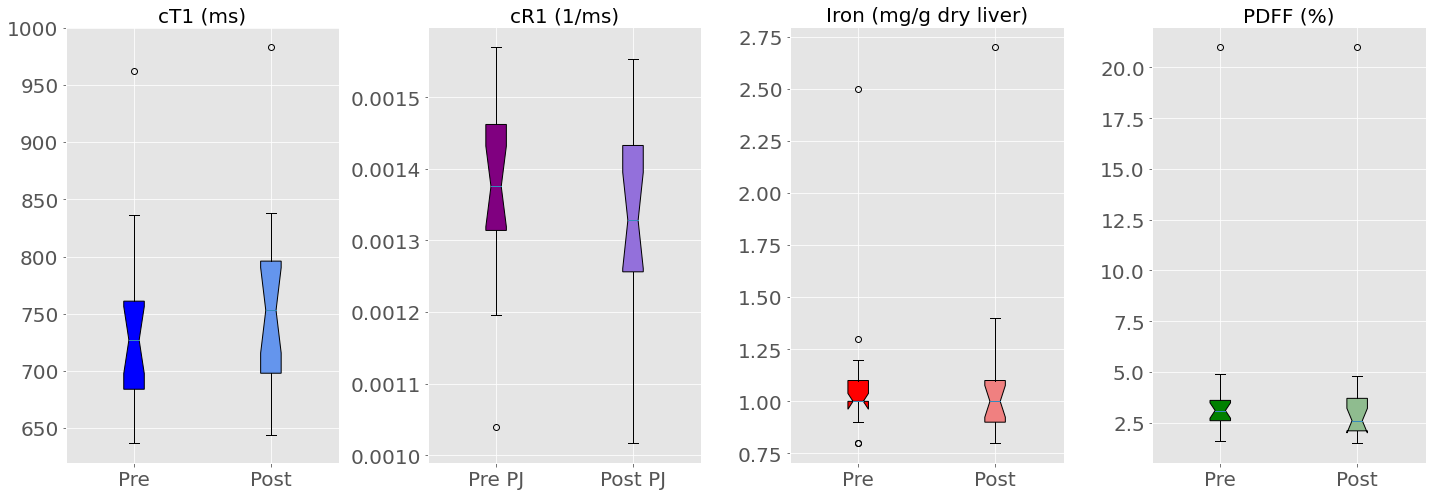

In [18]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 7)) #24, 8
# fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 25)

bplot1 = axes[0].boxplot([PA["cT1 median (Pre PJ)"],PA["cT1 median (Post PJ)"]], patch_artist = True, notch = True)
axes[0].set_title("cT1 (ms)", fontsize = 20)
# axes[0].set_ylabel("cT1 (ms)", fontsize = 20)
axes[0].set_xticklabels(['Pre', 'Post'], fontsize = 20)
axes[0].tick_params(axis='y', labelsize=20)
colors = ['blue', 'cornflowerblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

bplot2 = axes[1].boxplot([PA['cR1 median (Pre PJ)'], PA['cR1 median (Post PJ)']], patch_artist = True, notch = True)
axes[1].set_title('cR1 (1/ms)', fontsize = 20)
# axes[1].set_ylabel('cR1 (1/ms)', fontsize = 20)
axes[1].set_xticklabels(['Pre PJ', 'Post PJ'], fontsize = 20)
axes[1].tick_params(axis='y', labelsize=20)
colors = ['purple', 'mediumpurple']
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)

bplot3 = axes[2].boxplot([PA["Iron median (Pre PJ)"],PA["Iron median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'red'))
axes[2].set_title("Iron (mg/g dry liver)", fontsize = 20)
# axes[2].set_ylabel("Iron (mg/g dry liver)", fontsize = 20)
axes[2].set_xticklabels(['Pre', 'Post'], fontsize = 20)
axes[2].tick_params(axis='y', labelsize=20)
colors = ['red', 'lightcoral']
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor(color)

bplot4 = axes[3].boxplot([PA["PDFF median (Pre PJ)"],PA["PDFF median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'green'))
axes[3].set_title("PDFF (%)", fontsize = 20)
# axes[3].set_ylabel("PDFF (%)", fontsize = 20)
axes[3].set_xticklabels(['Pre', 'Post'], fontsize = 20)
axes[3].tick_params(axis='y', labelsize=20)
colors = ['green', 'darkseagreen']
for patch, color in zip(bplot4['boxes'], colors):
    patch.set_facecolor(color)
print('There was a outlier in the cR1 metric for the 3T Prisma Pre PJ group. From visual point of view, cT1 and cR1 groups follow close to normal distribution while not the iron and PDFF group')
plt.tight_layout()

#plt.savefig("PA Box.png")

From visual point of view, cT1 and cR1 groups follow close to normal distribution while not the iron and PDFF group. There is less outlier in the 1.5T data than that for 3T


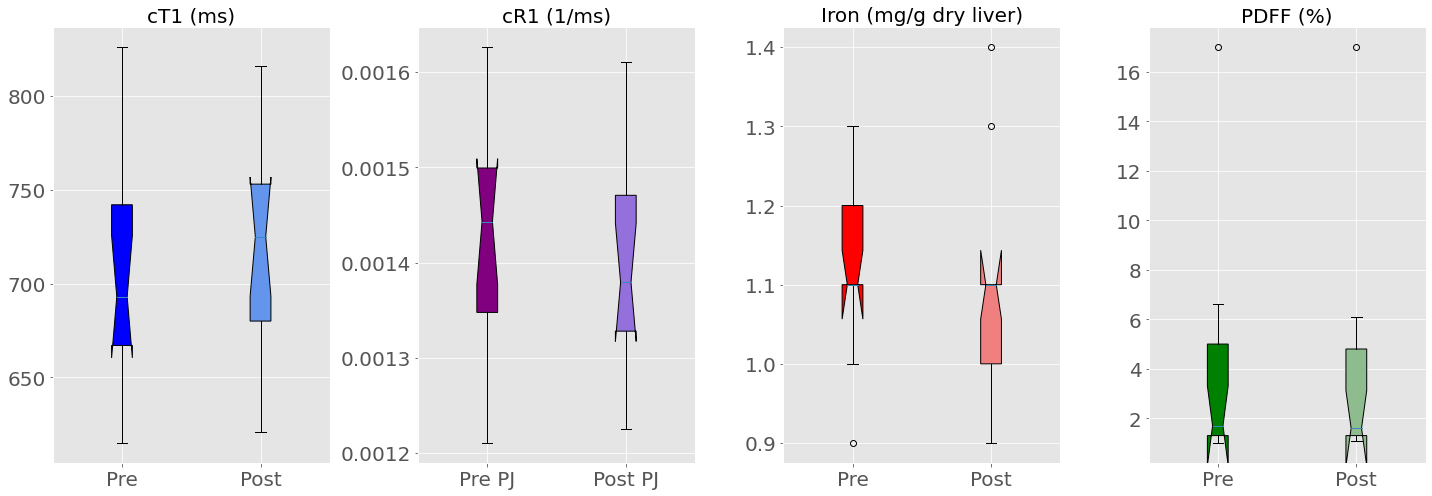

In [19]:
# Plor box plot to see the distributiont of the paried values.

plt.style.use('ggplot')

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,7))
# fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

bplot0 = axes[0].boxplot([AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"]], patch_artist = True, notch = True)
axes[0].set_title("cT1 (ms)", fontsize = 20)
# axes[0].set_ylabel("cT1 (ms)", fontsize = 20)
axes[0].set_xticklabels(['Pre', 'Post'], fontsize = 20)
axes[0].tick_params(axis='y', labelsize=20)
colors = ['blue', 'cornflowerblue']
for patch, color in zip(bplot0['boxes'], colors):
    patch.set_facecolor(color)


bplot1 = axes[1].boxplot([AV['cR1 median (Pre PJ)'], AV['cR1 median (Post PJ)']], patch_artist = True, notch = True)
axes[1].set_title('cR1 (1/ms)', fontsize = 20)
# axes[1].set_ylabel('cR1 (1/ms)', fontsize = 20)
axes[1].set_xticklabels(['Pre PJ', 'Post PJ'], fontsize = 20)
axes[1].tick_params(axis='y', labelsize=20)
colors = ['purple', 'mediumpurple']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

bplot2 = axes[2].boxplot([AV["Iron median (Pre PJ)"],AV["Iron median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'red'))
axes[2].set_title("Iron (mg/g dry liver)", fontsize = 20)
# axes[2].set_ylabel("Iron (mg/g dry liver)", fontsize = 20)
axes[2].set_xticklabels(['Pre', 'Post'], fontsize = 20)
axes[2].tick_params(axis='y', labelsize=20)
colors = ['red', 'lightcoral']
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)

bplot3 = axes[3].boxplot([AV["PDFF median (Pre PJ)"],AV["PDFF median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'green'))
axes[3].set_title("PDFF (%)", fontsize = 20)
#axes[3].set_ylabel("PDFF (%)", fontsize = 20)
axes[3].set_xticklabels(['Pre', 'Post'], fontsize = 20)
axes[3].tick_params(axis='y', labelsize=20)
colors = ['green', 'darkseagreen']
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor(color)

print('From visual point of view, cT1 and cR1 groups follow close to normal distribution while not the iron and PDFF group. There is less outlier in the 1.5T data than that for 3T')
plt.tight_layout()
#plt.savefig("AV Box.png")

## Histogram

It is hard to judge whether each metric were drawn from normal distribution


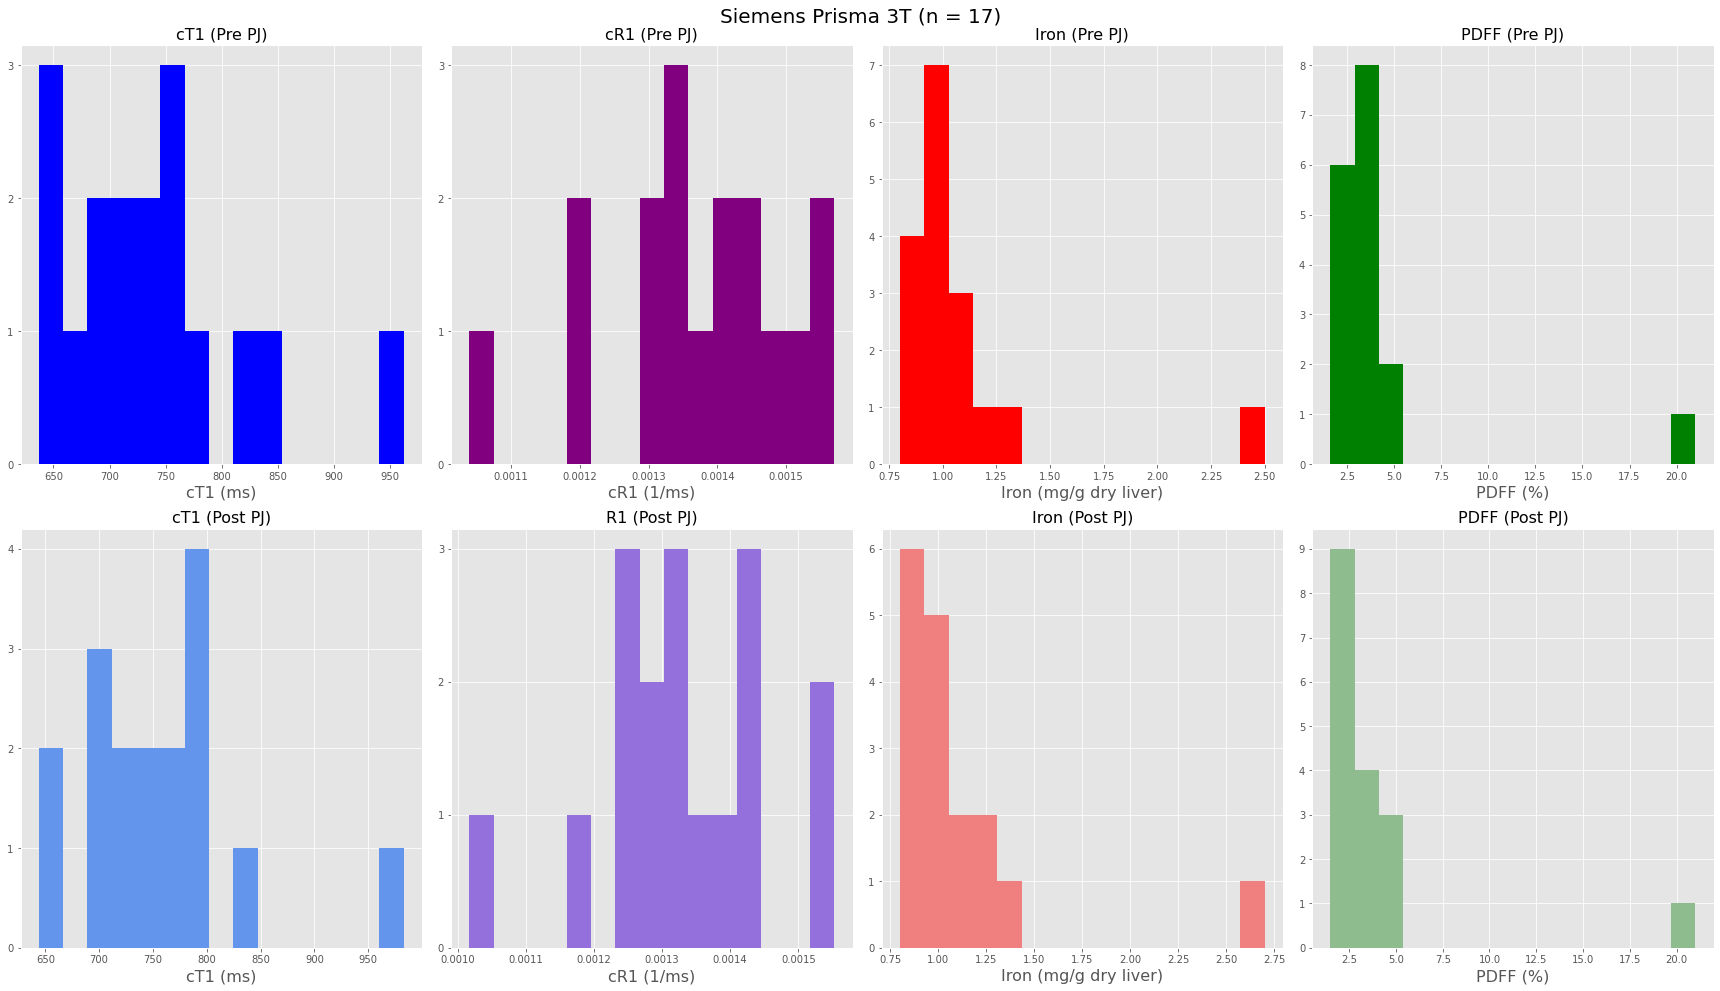

In [20]:
# Histograms to explore data distribution for metric cT1, Iron, PDFF under 3T

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (24,14))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

axes[0, 0].hist(PA["cT1 median (Pre PJ)"], bins = 15, color = 'blue')
axes[0, 0].set_title("cT1 (Pre PJ)", fontsize = 16)
axes[0, 0].set_xlabel("cT1 (ms)", fontsize = 16)
axes[0, 0].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[0, 1].hist(PA['cR1 median (Pre PJ)'], bins = 15, color = 'purple')
axes[0, 1].set_title('cR1 (Pre PJ)', fontsize = 16)
axes[0, 1].set_xlabel('cR1 (1/ms)', fontsize = 16)
axes[0, 1].yaxis.set_major_locator(MaxNLocator(integer = True))


axes[0, 2].hist(PA["Iron median (Pre PJ)"], bins = 15, color = 'red')
axes[0, 2].set_title("Iron (Pre PJ)", fontsize = 16)
axes[0, 2].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)
axes[0, 2].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[0, 3].hist(PA["PDFF median (Pre PJ)"], bins = 15, color = 'green')
axes[0, 3].set_title("PDFF (Pre PJ)", fontsize = 16)
axes[0, 3].set_xlabel("PDFF (%)", fontsize = 16)
axes[0, 3].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 0].hist(PA["cT1 median (Post PJ)"], bins = 15, color = 'cornflowerblue')
axes[1, 0].set_title("cT1 (Post PJ)", fontsize = 16)
axes[1, 0].set_xlabel("cT1 (ms)", fontsize = 16)
axes[1, 0].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 1].hist(PA['cR1 median (Post PJ)'], bins = 15, color = 'mediumpurple')
axes[1, 1].set_title('R1 (Post PJ)', fontsize = 16)
axes[1, 1].set_xlabel('cR1 (1/ms)', fontsize = 16)
axes[1, 1].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 2].hist(PA["Iron median (Post PJ)"], bins = 15, color = 'lightcoral')
axes[1, 2].set_title("Iron (Post PJ)", fontsize = 16)
axes[1, 2].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)
axes[1, 2].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 3].hist(PA["PDFF median (Post PJ)"], bins = 15, color = 'darkseagreen')
axes[1, 3].set_title("PDFF (Post PJ)", fontsize = 16)
axes[1, 3].set_xlabel("PDFF (%)", fontsize = 16)
axes[1, 3].yaxis.set_major_locator(MaxNLocator(integer = True))
print('It is hard to judge whether each metric were drawn from normal distribution')
plt.tight_layout()
#plt.savefig("PA Hist bin = 15.png")

There are many zero iron measurements.
It is hard to judge whether each metric were drawn from normal distribution


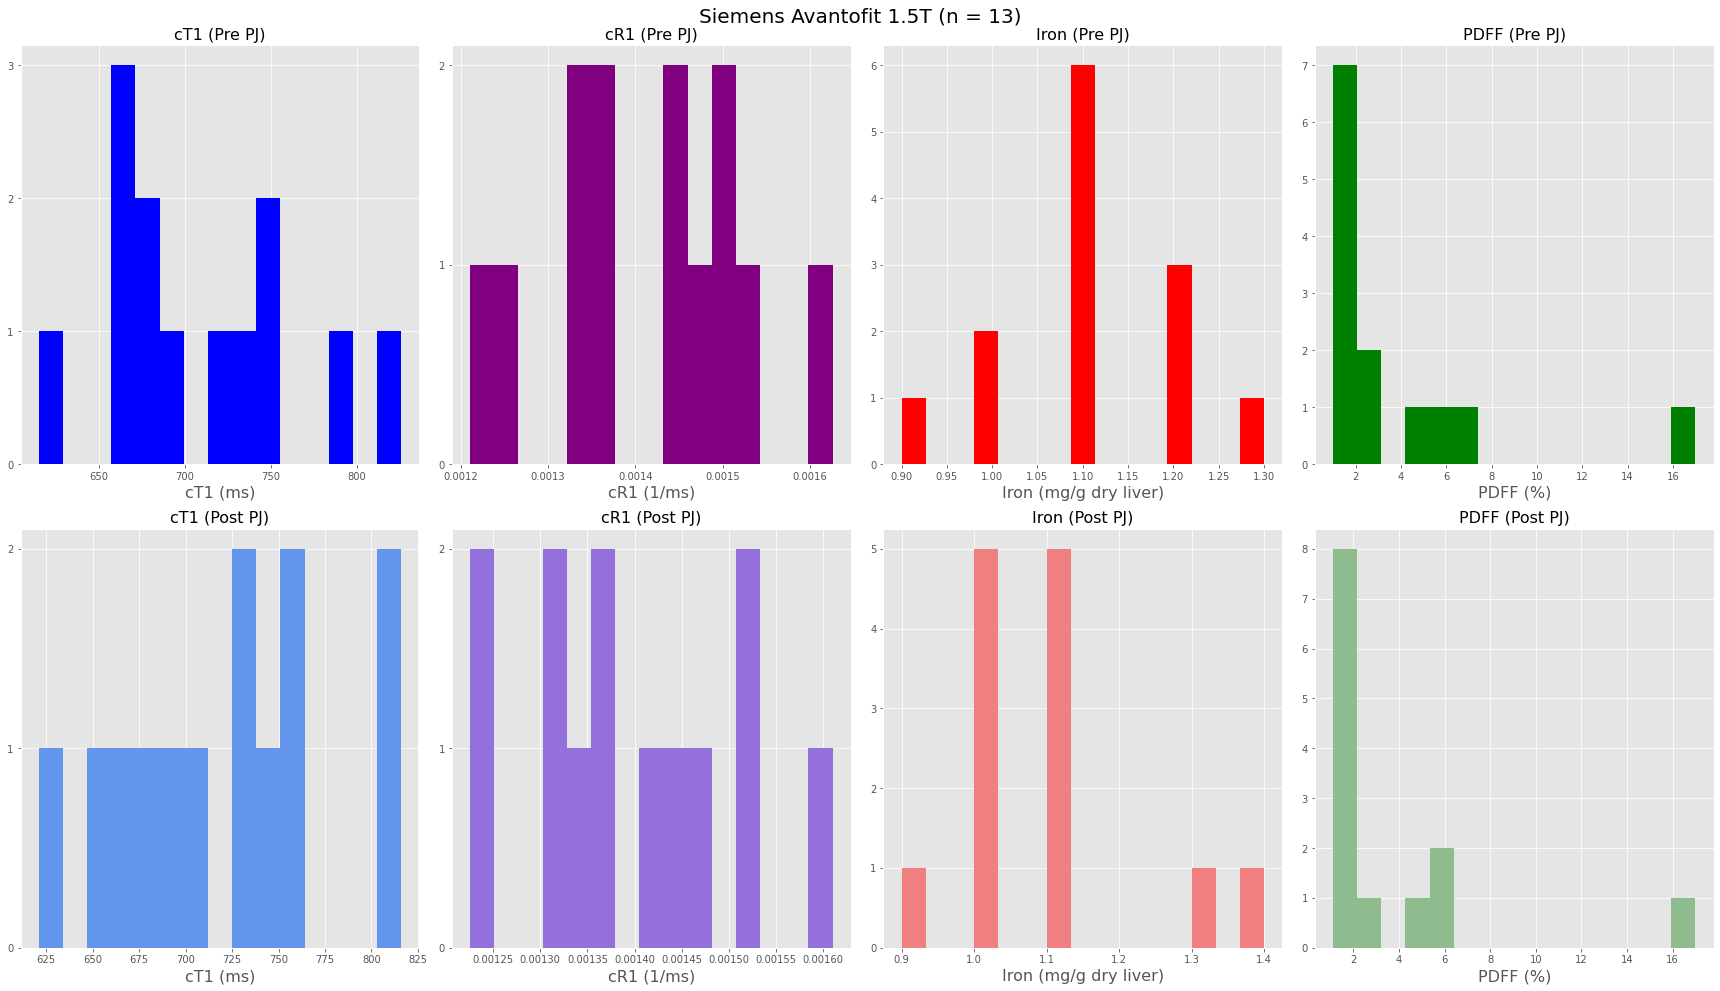

In [21]:
# Histograms to explore data distribution for metric cT1, Iron, PDFF under 1.5T

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (24,14))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

axes[0, 0].hist(AV["cT1 median (Pre PJ)"], bins = 15, color = 'blue')
axes[0, 0].set_title("cT1 (Pre PJ)", fontsize = 16)
axes[0, 0].set_xlabel("cT1 (ms)", fontsize = 16)
axes[0, 0].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[0, 1].hist(AV['cR1 median (Pre PJ)'], bins = 15, color = 'purple')
axes[0, 1].set_title('cR1 (Pre PJ)', fontsize = 16)
axes[0, 1].set_xlabel('cR1 (1/ms)', fontsize = 16)
axes[0, 1].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[0, 2].hist(AV["Iron median (Pre PJ)"], bins = 15, color = 'red')
axes[0, 2].set_title("Iron (Pre PJ)", fontsize = 16)
axes[0, 2].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)
axes[0, 2].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[0, 3].hist(AV["PDFF median (Pre PJ)"], bins = 15, color = 'green')
axes[0, 3].set_title("PDFF (Pre PJ)", fontsize = 16)
axes[0, 3].set_xlabel("PDFF (%)", fontsize = 16)
axes[0, 3].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 0].hist(AV["cT1 median (Post PJ)"], bins = 15, color = 'cornflowerblue')
axes[1, 0].set_title("cT1 (Post PJ)", fontsize = 16)
axes[1, 0].set_xlabel("cT1 (ms)", fontsize = 16)
axes[1, 0].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 1].hist(AV['cR1 median (Post PJ)'], bins = 15, color = 'mediumpurple')
axes[1, 1].set_title('cR1 (Post PJ)', fontsize = 16)
axes[1, 1].set_xlabel('cR1 (1/ms)', fontsize = 16)
axes[1, 1].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 2].hist(AV["Iron median (Post PJ)"], bins = 15, color = 'lightcoral')
axes[1, 2].set_title("Iron (Post PJ)", fontsize = 16)
axes[1, 2].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)
axes[1, 2].yaxis.set_major_locator(MaxNLocator(integer = True))

axes[1, 3].hist(AV["PDFF median (Post PJ)"], bins = 15, color = 'darkseagreen')
axes[1, 3].set_title("PDFF (Post PJ)", fontsize = 16)
axes[1, 3].set_xlabel("PDFF (%)", fontsize = 16)
axes[1, 3].yaxis.set_major_locator(MaxNLocator(integer = True))

print('There are many zero iron measurements.')
print('It is hard to judge whether each metric were drawn from normal distribution')
plt.tight_layout()
# #plt.savefig("AV Hist bin 15.png")

# Visualise Trend

## Bar Plot
This is help to get a grasp of the differences of netrics before and after pineapple juice ingestion on a individual level.

In [57]:

PA_cT1_dif  = PA["cT1 median (Post PJ)"] -  PA["cT1 median (Pre PJ)"]
PA_cR1_dif  = PA["cR1 median (Post PJ)"] -  PA["cR1 median (Pre PJ)"]
PA_Iron_dif = PA["Iron median (Post PJ)"] - PA["Iron median (Pre PJ)"]
PA_PDFF_dif = PA["PDFF median (Post PJ)"] - PA["PDFF median (Pre PJ)"]

PA["cT1 Dif"]  = PA_cT1_dif
PA["cR1 Dif"]  = PA_cR1_dif
PA["Iron Dif"] = PA_Iron_dif
PA["PDFF Dif"] = PA_PDFF_dif

PA['median_cT1Diff']  = PA_cT1_dif.median() #.round(2)
PA['median_cR1Diff']  = PA_cR1_dif.median() #.round(2)
PA['median_IronDiff'] = PA_Iron_dif.median() #.round(2)
PA['median_PDFFDiff'] = PA_PDFF_dif.median() #.round(2)

PA['mean_cT1Diff']  = PA_cT1_dif.mean() #.round(2)
PA['mean_cR1Diff']  = PA_cR1_dif.mean() #.round(2)
PA['mean_IronDiff'] = PA_Iron_dif.mean() #.round(2)
PA['mean_PDFFDiff'] = PA_PDFF_dif.mean() #.round(2)

print(PA['median_cT1Diff'].unique())
print(PA['mean_cT1Diff'].unique())
print(PA['median_cR1Diff'].unique())
print(PA['mean_cR1Diff'].unique())
print(PA['median_IronDiff'].unique())
print(PA['mean_IronDiff'].unique())
print(PA['median_PDFFDiff'].unique())
print(PA['mean_PDFFDiff'].unique())

[21.]
[19.29411765]
[-2.90266634e-05]
[-3.60887008e-05]
[0.]
[0.]
[-0.2]
[-0.22352941]


In [23]:
type(PA['median_cT1Diff'].unique())

numpy.ndarray

/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_19516/3304604521.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1.set_xticks([]) #ax1.get_xticks()
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_19516/3304604521.py:22: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax2.set_xticks([]) #ax2.get_xticks()
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_19516/3304604521.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax3.set_xticks([]) #ax3.get_xticks()
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel

The difference between the population median and population mean for each metric delta value is smaller than that for 1.5T. It is expected that, the delta of cT1 and delta of cR1 were in opposite side of the horizontal axis.


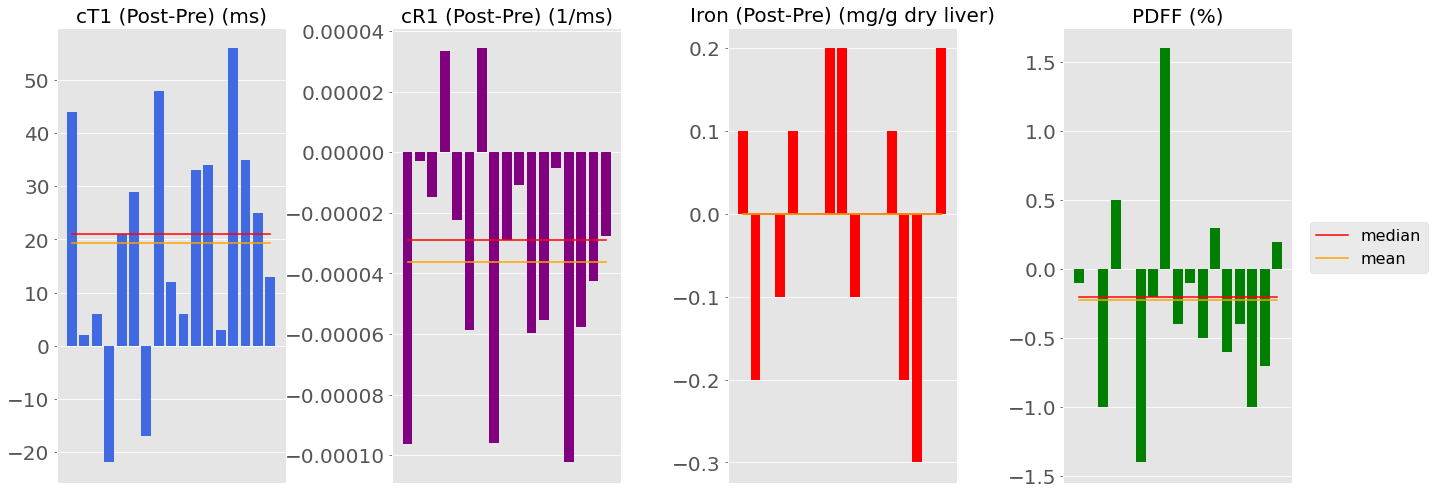

In [84]:

plt.style.use('ggplot')
fig = plt.figure(figsize = (20,7))
#fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

ax1 = fig.add_subplot(141)
plt.bar(PA["Record Id"], PA["cT1 Dif"], color = "royalblue")
plt.plot(PA["Record Id"], PA["median_cT1Diff"], color = 'red', label = 'median')    #+ str(PA['median_cT1Diff'].unique())+ ' (ms)')
plt.plot(PA["Record Id"], PA["mean_cT1Diff"], color = 'orange', label = 'mean')    #+ str(PA['mean_cT1Diff'].unique())+ ' (ms)')
# plt.legend(loc='lower center', fontsize = 16)
ax1.set_title("cT1 (Post-Pre) (ms)", fontsize = 20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xticks([]) #ax1.get_xticks()
# ax1.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

ax2 = fig.add_subplot(142)
plt.bar(PA["Record Id"], PA["cR1 Dif"], color = "purple")
plt.plot(PA["Record Id"], PA["median_cR1Diff"], color = 'red')    #+ str(PA['median_cR1Diff'].unique())+ ' (1/ms)')
plt.plot(PA["Record Id"], PA["mean_cR1Diff"], color = 'orange')    #+ str(PA['median_cR1Diff'].unique())+ ' (1/ms)')
# plt.legend(loc='lower center', fontsize = 16)
ax2.set_title("cR1 (Post-Pre) (1/ms)", fontsize = 20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xticks([]) #ax2.get_xticks()
# ax2.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

ax3 = fig.add_subplot(143)
plt.bar(PA["Record Id"], PA["Iron Dif"], color = "red")
plt.plot(PA["Record Id"], PA["median_IronDiff"], color = 'red')    #+ str(PA['median_IronDiff'].unique())+ ' (mg/g dry liver)')
plt.plot(PA["Record Id"], PA["mean_IronDiff"], color = 'orange')    #+ str(PA['mean_IronDiff'].unique())+ ' (mg/g dry liver)')
# plt.legend(loc='lower center', fontsize = 14)
ax3.set_title("Iron (Post-Pre) (mg/g dry liver)", fontsize = 20)
ax3.tick_params(axis='y', labelsize=20)
ax3.set_xticks([]) #ax3.get_xticks()
# ax3.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

ax4 = fig.add_subplot(144)
plt.bar(PA["Record Id"], PA["PDFF Dif"], color = "green")
plt.plot(PA["Record Id"], PA["median_PDFFDiff"], color = 'red')    #+ str(PA['median_PDFFDiff'].unique())+ ' (%)')
plt.plot(PA["Record Id"], PA["mean_PDFFDiff"], color = 'orange')    #+ str(PA['mean_PDFFDiff'].unique())+ ' (%)')
# plt.legend(loc='lower center', fontsize = 16)
ax4.set_title("PDFF (%)", fontsize = 20)
ax4.tick_params(axis='y', labelsize=20)
ax4.set_xticks([]) # ax4.get_xticks()
# ax4.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

plt.tight_layout()
plt.subplots_adjust(right=0.9)
fig.legend(loc = 'center right', fontsize = 16)
# plt.savefig("PA Bar Delta.png")
print('The difference between the population median and population mean for each metric delta value is smaller than that for 1.5T. It is expected that, the delta of cT1 and delta of cR1 were in opposite side of the horizontal axis.')

In [80]:
AV['cT1_dif']  = AV["cT1 median (Post PJ)"] -  AV["cT1 median (Pre PJ)"]
AV['cR1_dif']  = AV["cR1 median (Post PJ)"] -  AV["cR1 median (Pre PJ)"]
AV['Iron_dif'] = AV["Iron median (Post PJ)"] - AV["Iron median (Pre PJ)"]
AV['PDFF_dif'] = AV["PDFF median (Post PJ)"] - AV["PDFF median (Pre PJ)"]

AV['median_cT1Diff']  = AV['cT1_dif'].median()  #.round(2)
AV['median_cR1Diff']  = AV['cR1_dif'].median()  #.round(2)
AV['median_IronDiff'] = AV['Iron_dif'].median()  #.round(2)
AV['median_PDFFDiff'] = AV['PDFF_dif'].median()  #.round(2)

AV['mean_cT1Diff']  = AV['cT1_dif'].mean()  #.round(2)
AV['mean_cR1Diff']  = AV['cR1_dif'].mean()  #.round(2)
AV['mean_IronDiff'] = AV['Iron_dif'].mean()  #.round(2)
AV['mean_PDFFDiff'] = AV['PDFF_dif'].mean()  #.round(2)

print(AV['median_cT1Diff'].unique(), AV['mean_cT1Diff'].unique())
print(AV['median_cR1Diff'].unique(), AV['mean_cR1Diff'].unique())
print(AV['median_IronDiff'].unique(), AV['mean_IronDiff'].unique())
print(AV['median_PDFFDiff'].unique(), AV['mean_PDFFDiff'].unique())


12.0 9.384615384615385
-1.8845168098899573e-05 -1.8638845976547204e-05
0.0 -0.02307692307692308
-0.10000000000000009 -0.1538461538461538


In [79]:
(AV['cR1_dif'].median(), AV['cR1_dif'].mean())

(-1.8845168098899573e-05, -1.8638845976547204e-05)

/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_19516/2237420040.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1.set_xticks([]) # ax1.get_xticks()
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_19516/2237420040.py:23: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax2.set_xticks([]) # ax2.get_xticks()
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_19516/2237420040.py:33: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax3.set_xticks([]) # ax3.get_xticks()
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipyker

Note that in iron metric (middle graph), there were a lot of quantified iron value effectively being zero and therefore, the difference/delta/change in iron were also zero for these case. The red lines indicate the population median for each metric while orange lines indicate the population mean for each metric


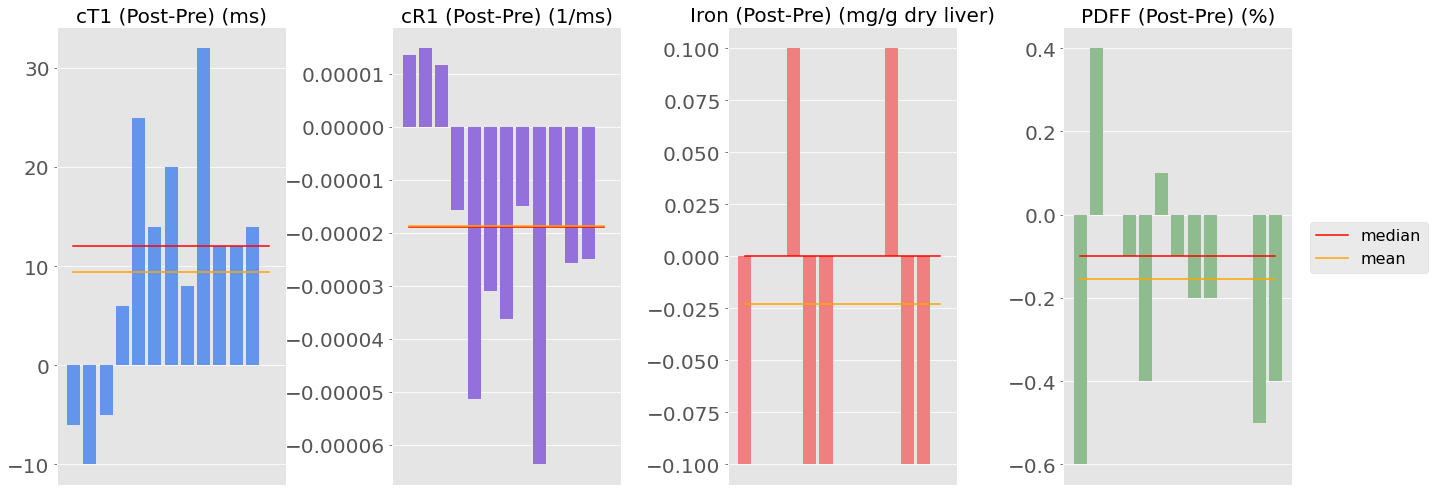

In [85]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (20,7))
# fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

ax1 = fig.add_subplot(141)
plt.bar(AV['Record Id'], AV['cT1_dif'], color = 'cornflowerblue')
plt.plot(AV['Record Id'], AV['median_cT1Diff'], color = 'red', label = 'median')    #+ str(AV['median_cT1Diff'].unique())+ ' (ms)')
plt.plot(AV['Record Id'], AV['mean_cT1Diff'], color = 'orange', label = 'mean')    #+ str(AV['mean_cT1Diff'].unique())+ ' (ms)')
# plt.legend(loc = 'lower center', fontsize = 16)
ax1.set_title('cT1 (Post-Pre) (ms)', fontsize = 20)
ax1.tick_params(axis = 'y', labelsize = 20)
ax1.set_xticks([]) # ax1.get_xticks()
# ax1.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')

ax2 = fig.add_subplot(142)
plt.bar(AV['Record Id'], AV['cR1_dif'], color = 'mediumpurple')
plt.plot(AV['Record Id'], AV['median_cR1Diff'], color = 'red')    #+ str(AV['median_cR1Diff'].unique())+ ' (1/ms)')
plt.plot(AV['Record Id'], AV['mean_cR1Diff'], color = 'orange')    #+ str(AV['mean_cR1Diff'].unique())+ ' (1/ms)')
# plt.legend(loc = 'lower center', fontsize = 16)
ax2.set_title('cR1 (Post-Pre) (1/ms)', fontsize = 20)
ax2.tick_params(axis = 'y', labelsize = 20)
plt.ticklabel_format(axis='y', style = 'plain')
ax2.set_xticks([]) # ax2.get_xticks()
# ax2.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')

ax3 = fig.add_subplot(143)
plt.bar(AV['Record Id'], AV['Iron_dif'], color = 'lightcoral')
plt.plot(AV['Record Id'], AV['median_IronDiff'], color = 'red')    #+ str(AV['median_IronDiff'].unique())+ ' (mg/g dry liver)')
plt.plot(AV['Record Id'], AV['mean_IronDiff'], color = 'orange')    #+ str(AV['mean_IronDiff'].unique())+ ' (mg/g dry liver)')
# plt.legend(loc = 'lower center', fontsize = 12)
ax3.set_title('Iron (Post-Pre) (mg/g dry liver)', fontsize = 20)
ax3.tick_params(axis = 'y', labelsize = 20)
ax3.set_xticks([]) # ax3.get_xticks()
# ax3.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')

ax4 = fig.add_subplot(144)
plt.bar(AV['Record Id'], AV['PDFF_dif'], color = 'darkseagreen')
plt.plot(AV['Record Id'], AV['median_PDFFDiff'], color = 'red')    #+ str(AV['median_PDFFDiff'].unique())+ ' (%)')
plt.plot(AV['Record Id'], AV['mean_PDFFDiff'], color = 'orange')    #+ str(AV['mean_PDFFDiff'].unique())+ ' (%)')
# plt.legend(loc = 'lower center', fontsize = 16)
ax4.set_title('PDFF (Post-Pre) (%)', fontsize = 20)
ax4.tick_params(axis = 'y', labelsize = 20)
ax4.set_xticks([]) # ax4.get_xticks()
# ax4.set_xticklabels(AV['Record Id'], rotation = 50, ha = 'right')

plt.tight_layout()
plt.subplots_adjust(right=0.9)
fig.legend(loc = 'center right', fontsize = 16)

print('Note that in iron metric (middle graph), there were a lot of quantified iron value effectively being zero and therefore, the difference/delta/change in iron were also zero for these case. The red lines indicate the population median for each metric while orange lines indicate the population mean for each metric')
plt.savefig('AV Bar Delta.png')

## Scatter Line Plot
This is to help us visually inspect the trend of the the dataset.

In [87]:
#define the plotting function
def PrePost(a, b):
    plt.scatter(np.zeros(data_length), a, color = "blue")
    plt.scatter(np.ones(data_length), b, color = "green")

    for i in range(data_length):
        plt.plot( [0,1], [a.iloc[i], b.iloc[i]], color = "k")
    
    plt.plot([0,1], [np.median(a), np.median(b)], color = "red", linewidth = 4.0, label = 'median')
    plt.plot([0,1], [np.mean(a), np.mean(b)], color = "orange", linewidth = 4.0, label = 'mean')
    # plt.legend(loc = 'upper center', fontsize = 16)

The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.
The visual representation of the line trends showed increased cT1 values and decreased cR1 values after pineapple juice ingestion measured under 3T field strength


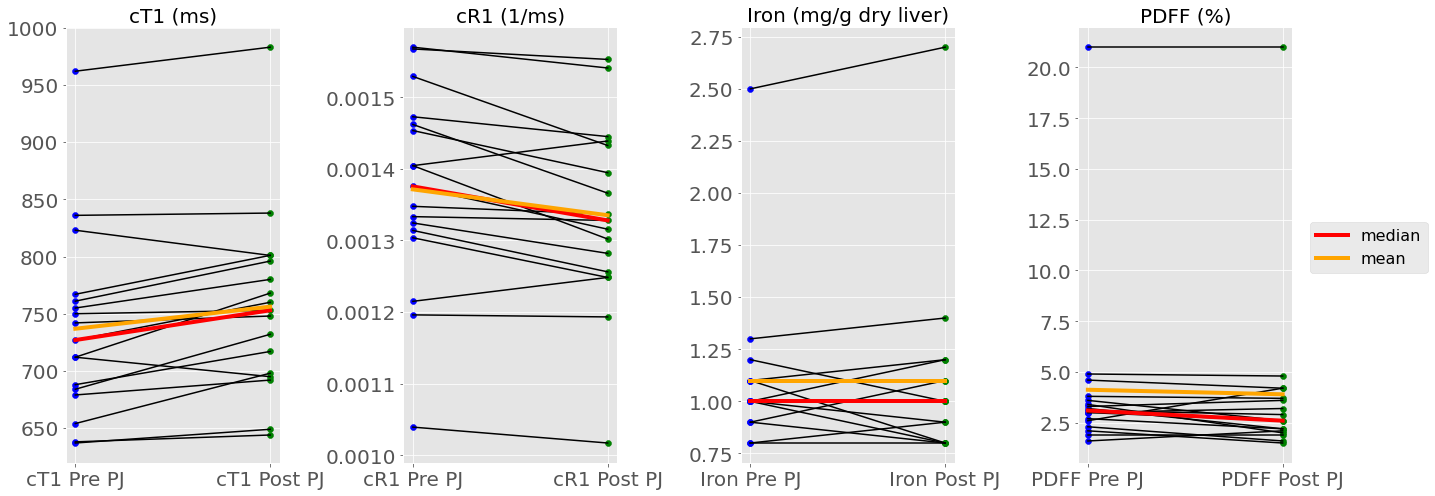

In [94]:
# Scatter Line trend plot for 3T
plt.style.use('ggplot')
fig = plt.figure(figsize = (20,7))
# fig.suptitle("Siemens Prisma 3T (n = 17)", fontsize = 20)

data_length = len(PA["cT1 median (Pre PJ)"])
fig.add_subplot(141)
PrePost(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
plt.xticks([0,1], ["cT1 Pre PJ", "cT1 Post PJ"], fontsize = 20)
plt.tick_params(axis = 'y', labelsize = 20)
plt.title("cT1 (ms)", fontsize = 20)

fig.legend(loc = 'center right', fontsize = 20) # use the first subplot's legend to represent the legends for all subplots

fig.add_subplot(142)
PrePost(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"])
plt.xticks([0,1], ["cR1 Pre PJ", "cR1 Post PJ"], fontsize = 20) 
plt.tick_params(axis = 'y', labelsize = 20)
plt.title("cR1 (1/ms)", fontsize = 20)

fig.add_subplot(143)
PrePost(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
plt.xticks([0,1], ["Iron Pre PJ", "Iron Post PJ"], fontsize = 20)
plt.tick_params(axis = 'y', labelsize = 20)
plt.title("Iron (mg/g dry liver)", fontsize = 20)

fig.add_subplot(144)
PrePost(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
plt.xticks([0,1], ["PDFF Pre PJ", "PDFF Post PJ"], fontsize = 20)
plt.tick_params(axis = 'y', labelsize = 20)
plt.title("PDFF (%)", fontsize = 20)

plt.tight_layout()
plt.subplots_adjust(right=0.9)

plt.savefig("PA Trend.png")

print('The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.')
print('The visual representation of the line trends showed increased cT1 values and decreased cR1 values after pineapple juice ingestion measured under 3T field strength')

The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.
From both population median and population mean, the visual representation of the line trends showed an increase in cT1 values and decrease in cR1 values measured under 1.5T field strength. This is also showed in 3T data. It was also found that the population median showed a greater change comparing to population mean.


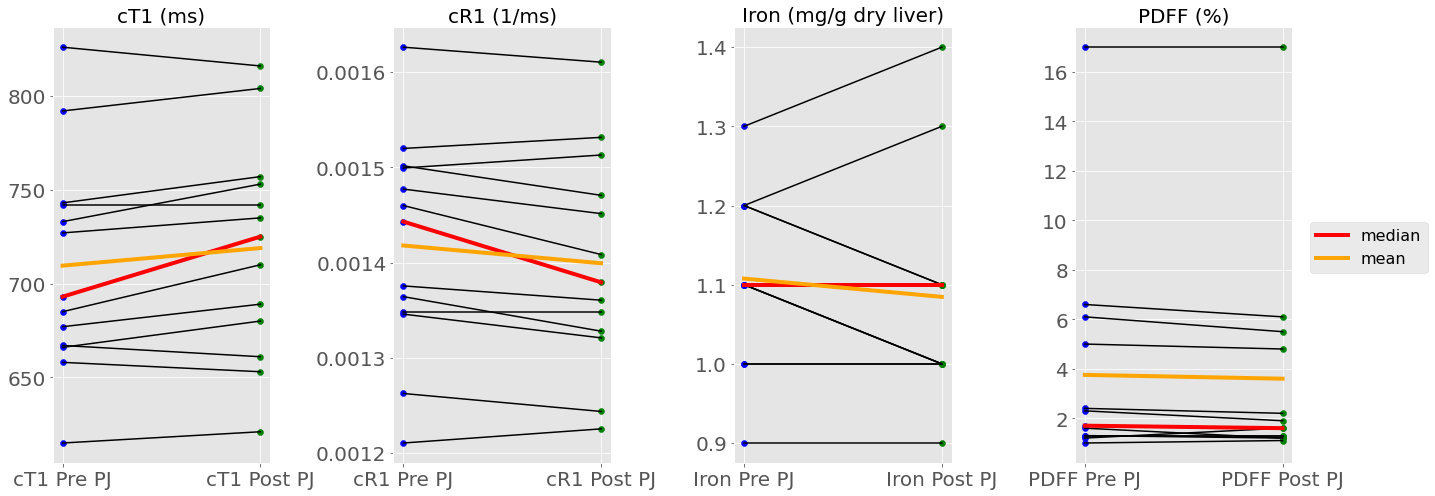

In [101]:
# Scatter Line trend plot for 1.5T
plt.style.use('ggplot')
fig = plt.figure(figsize = (20,7))
# fig.suptitle("Siemens Avantofit 1.5T (n = 13)", fontsize = 20)

data_length = len(AV["cT1 median (Pre PJ)"])

fig.add_subplot(141)
PrePost(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
plt.xticks([0,1], ["cT1 Pre PJ", "cT1 Post PJ"], fontsize = 20) 
plt.title("cT1 (ms)", fontsize = 20)
plt.tick_params(axis='y', labelsize = 20)

fig.legend(loc = 'center right', fontsize = 16) # use the first subplot's legend to represent the legends for all subplots

fig.add_subplot(142)
PrePost(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"])
plt.xticks([0,1], ["cR1 Pre PJ", "cR1 Post PJ"], fontsize = 20) 
plt.title("cR1 (1/ms)", fontsize = 20)
plt.tick_params(axis='y', labelsize = 20)

fig.add_subplot(143)
PrePost(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
plt.xticks([0,1], ["Iron Pre PJ", "Iron Post PJ"], fontsize = 20)
plt.title("Iron (mg/g dry liver)", fontsize = 20)
plt.tick_params(axis='y', labelsize = 20)

fig.add_subplot(144)
PrePost(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
plt.xticks([0,1], ["PDFF Pre PJ", "PDFF Post PJ"], fontsize = 20)
plt.title("PDFF (%)", fontsize = 20)
plt.tick_params(axis='y', labelsize = 20)

plt.tight_layout()
plt.subplots_adjust(right=0.9)

plt.savefig("AV Trend.png")
print('The red lines connect the population median pre PJ to population median pre PJ for each metric, while the orange lines connect the population mean pre PJ to population mean post PJ for each metric.')
print('From both population median and population mean, the visual representation of the line trends showed an increase in cT1 values and decrease in cR1 values measured under 1.5T field strength. This is also showed in 3T data. It was also found that the population median showed a greater change comparing to population mean.')

# Shapiro Wilk Test for Normality

In [30]:

a = stats.shapiro(PA['cT1 median (Pre PJ)'])
a1 = stats.shapiro(PA['cT1 median (Post PJ)'])
b = stats.shapiro(PA['cR1 median (Pre PJ)'])
b1 = stats.shapiro(PA['cR1 median (Post PJ)'])
c = stats.shapiro(PA['Iron median (Pre PJ)'])
c1 = stats.shapiro(PA['Iron median (Post PJ)'])
d = stats.shapiro(PA['PDFF median (Pre PJ)'])
d1 = stats.shapiro(PA['PDFF median (Post PJ)'])

data = {'Biomarkers' : ['cT1 Pre PJ', 'cT1 (Post PJ)', 'cR1 Pre PJ', 'cR1 (Post PJ)', 'Iron (Pre PJ)', 'Iron (Post PF)', 'PDFF (Pe PJ)', 'PDFF (Post PJ)'], 
        'Shapiro Wilk Test Result (W, p value)': [a, a1, b, b1, c, c1, d, d1], 
        'Normal Distribution?': ['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No']}
SP = pd.DataFrame(data = data)
SP.style.set_caption('Siemens Prisma 3T')
# dfi.export(SP, 'PA Shapiro Wilk Test for Normality Nov 10.png')

,Biomarkers,"Shapiro Wilk Test Result (W, p value)",Normal Distribution?
0,cT1 Pre PJ,"ShapiroResult(statistic=0.900958240032196, pvalue=0.07047820091247559)",Yes
1,cT1 (Post PJ),"ShapiroResult(statistic=0.9062672257423401, pvalue=0.08653995394706726)",Yes
2,cR1 Pre PJ,"ShapiroResult(statistic=0.9566574096679688, pvalue=0.5697479248046875)",Yes
3,cR1 (Post PJ),"ShapiroResult(statistic=0.960710346698761, pvalue=0.6448699235916138)",Yes
4,Iron (Pre PJ),"ShapiroResult(statistic=0.5656453371047974, pvalue=4.929992883262457e-06)",No
5,Iron (Post PF),"ShapiroResult(statistic=0.5974621772766113, pvalue=9.838609912549146e-06)",No
6,PDFF (Pe PJ),"ShapiroResult(statistic=0.4432595372200012, pvalue=4.433605909071048e-07)",No
7,PDFF (Post PJ),"ShapiroResult(statistic=0.4593563675880432, pvalue=5.966778076071932e-07)",No


In [31]:
# Use Shapio- Wilk test to test Normality
# If W is less than one, the dataset is away from being drawn from normal distribution.
# The p value of Shapiro Wilk Test is to test the hyposthesis of the Shapio-Wilk test to reject the null Ho
# Shapiro Wilk test is quite sensitive, sometimes if the data from histigram seems normallt distributed, it can still be test with parametric t test.
# https://www.youtube.com/watch?v=dRAqSsgkCUc&ab_channel=MatthewE.Clapham


a = stats.shapiro(AV['cT1 median (Pre PJ)'])
a1 = stats.shapiro(AV['cT1 median (Post PJ)'])

b = stats.shapiro(AV['cR1 median (Pre PJ)'])
b1 = stats.shapiro(AV['cR1 median (Post PJ)'])

c = stats.shapiro(AV['Iron median (Pre PJ)'])
c1 = stats.shapiro(AV['Iron median (Post PJ)'])

d = stats.shapiro(AV['PDFF median (Pre PJ)'])
d1 = stats.shapiro(AV['PDFF median (Post PJ)'])

data = {'Biomarkers' : ['cT1 Pre PJ', 'cT1 (Post PJ)', 'cT1 (Pre PJ)', 'cR1 (Post PJ)', 'Iron (Pre PJ)', 'Iron (Post PF)', 'PDFF (Pe PJ)', 'PDFF (Post PJ)'], 
        'Shapiro Wilk Test Result (W, p value)': [a, a1, b, b1, c, c1, d, d1], 
        'Normal Distribution?': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No']}
SP = pd.DataFrame(data = data)
SP.style.set_caption('Siemens Avantofit 1.5T')
# dfi.export(SP, 'AV Shapiro Wilk Test for Normality Nov 10.png')

,Biomarkers,"Shapiro Wilk Test Result (W, p value)",Normal Distribution?
0,cT1 Pre PJ,"ShapiroResult(statistic=0.9594494104385376, pvalue=0.7451412081718445)",Yes
1,cT1 (Post PJ),"ShapiroResult(statistic=0.9780265688896179, pvalue=0.9685270190238953)",Yes
2,cT1 (Pre PJ),"ShapiroResult(statistic=0.9732586145401001, pvalue=0.9298766851425171)",Yes
3,cR1 (Post PJ),"ShapiroResult(statistic=0.9765700697898865, pvalue=0.9585272669792175)",Yes
4,Iron (Pre PJ),"ShapiroResult(statistic=0.926966667175293, pvalue=0.31089308857917786)",Yes
5,Iron (Post PF),"ShapiroResult(statistic=0.8337916135787964, pvalue=0.01767866685986519)",No
6,PDFF (Pe PJ),"ShapiroResult(statistic=0.6438919305801392, pvalue=0.0001609734899830073)",No
7,PDFF (Post PJ),"ShapiroResult(statistic=0.6100608110427856, pvalue=8.008096483536065e-05)",No


In [32]:
# Combining Shapiro Wilk Test for normality result

SW_AV_cT1_Pre = stats.shapiro(AV['cT1 median (Pre PJ)'])
SW_AV_cT1_Post = stats.shapiro(AV['cT1 median (Post PJ)'])

SW_AV_cR1_Pre = stats.shapiro(AV['cR1 median (Pre PJ)'])
SW_AV_cR1_Post = stats.shapiro(AV['cR1 median (Post PJ)'])

SW_AV_Iron_Pre = stats.shapiro(AV['Iron median (Pre PJ)'])
SW_AV_Iron_Post = stats.shapiro(AV['Iron median (Post PJ)'])

SW_AV_PDFF_Pre = stats.shapiro(AV['PDFF median (Pre PJ)'])
SW_AV_PDFF_Post = stats.shapiro(AV['PDFF median (Post PJ)'])

SW_PA_cT1_Pre = stats.shapiro(PA['cT1 median (Pre PJ)'])
SW_PA_cT1_Post = stats.shapiro(PA['cT1 median (Post PJ)'])

SW_PA_cR1_Pre = stats.shapiro(PA['cR1 median (Pre PJ)'])
SW_PA_cR1_Post = stats.shapiro(PA['cR1 median (Post PJ)'])

SW_PA_Iron_Pre = stats.shapiro(PA['Iron median (Pre PJ)'])
SW_PA_Iron_Post = stats.shapiro(PA['Iron median (Post PJ)'])

SW_PA_PDFF_Pre = stats.shapiro(PA['PDFF median (Pre PJ)'])
SW_PA_PDFF_Post = stats.shapiro(PA['PDFF median (Post PJ)'])

data = {
'Field Strength': ['1.5T','1.5T','1.5T','1.5T','1.5T','1.5T', '1.5T','1.5T', '3T','3T','3T','3T','3T','3T', '3T','3T'],
'Biomarkers' : ['cT1 (Pre PJ)', 'cT1 (Post PJ)', 'cR1(Pre PJ)', 'cR1(Post PJ)', 'Iron (Pre PJ)', 'Iron (Post PF)', 'PDFF (Pre PJ)', 'PDFF (Post PJ)', 'cT1 (Pre PJ)', 'cT1 (Post PJ)', 'cR1(Pre PJ)', 'cR1(Post PJ)', 'Iron (Pre PJ)', 'Iron (Post PF)', 'PDFF (Pre PJ)', 'PDFF (Post PJ)'], 
'Shapiro Wilk Test Result (statistic, p value)': [SW_AV_cT1_Pre, SW_AV_cT1_Post, SW_AV_cR1_Pre, SW_AV_cR1_Post, SW_AV_Iron_Pre, SW_AV_Iron_Post, SW_AV_PDFF_Pre, SW_AV_PDFF_Post, SW_PA_cT1_Pre, SW_PA_cT1_Post, SW_PA_cR1_Pre, SW_PA_cR1_Post, SW_PA_Iron_Pre, SW_PA_Iron_Post, SW_PA_PDFF_Pre, SW_PA_PDFF_Post],
'Normal Distribution?': ['Yes', 'Yes', 'Yes', 'Yes','Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No']
}

SWS = pd.DataFrame(data = data) # Shapiro Wilk Test Summary

#dfi.export(SWS, 'Shapiro Wilk Test for Normality Summary Nov 10.png')

print('This suggest that the cT1 is normally distributed and is fit for paired two-sided T-test. But Iron and PDFF data sets do not normal distribution, and therefore to compare the differences pre and post pineapple juice, a wilcoxon test should be performed.')
SWS.style.set_caption('Collective Shapiro Wilk Test')

This suggest that the cT1 is normally distributed and is fit for paired two-sided T-test. But Iron and PDFF data sets do not normal distribution, and therefore to compare the differences pre and post pineapple juice, a wilcoxon test should be performed.


,Field Strength,Biomarkers,"Shapiro Wilk Test Result (statistic, p value)",Normal Distribution?
0,1.5T,cT1 (Pre PJ),"ShapiroResult(statistic=0.9594494104385376, pvalue=0.7451412081718445)",Yes
1,1.5T,cT1 (Post PJ),"ShapiroResult(statistic=0.9780265688896179, pvalue=0.9685270190238953)",Yes
2,1.5T,cR1(Pre PJ),"ShapiroResult(statistic=0.9732586145401001, pvalue=0.9298766851425171)",Yes
3,1.5T,cR1(Post PJ),"ShapiroResult(statistic=0.9765700697898865, pvalue=0.9585272669792175)",Yes
4,1.5T,Iron (Pre PJ),"ShapiroResult(statistic=0.926966667175293, pvalue=0.31089308857917786)",Yes
5,1.5T,Iron (Post PF),"ShapiroResult(statistic=0.8337916135787964, pvalue=0.01767866685986519)",No
6,1.5T,PDFF (Pre PJ),"ShapiroResult(statistic=0.6438919305801392, pvalue=0.0001609734899830073)",No
7,1.5T,PDFF (Post PJ),"ShapiroResult(statistic=0.6100608110427856, pvalue=8.008096483536065e-05)",No
8,3T,cT1 (Pre PJ),"ShapiroResult(statistic=0.900958240032196, pvalue=0.07047820091247559)",Yes
9,3T,cT1 (Post PJ),"ShapiroResult(statistic=0.9062672257423401, pvalue=0.08653995394706726)",Yes


# Paire T test and Wilcoxon Rank Test

In [33]:
# T Test for 3T

cT1TT = stats.ttest_rel(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
cR1TT = stats.ttest_rel(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"])
IronTT = stats.ttest_rel(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
PDFFTT = stats.ttest_rel(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", 'cR1', "Iron", "PDFF"], 
        "Paired T Test (T, p value)":[cT1TT, cR1TT, IronTT, PDFFTT], 
        "T critical": [Tcritical, Tcritical, Tcritical, Tcritical], 
        "Difference is significant?": ['Yes', 'Yes', '', '']}
PA_TT = pd.DataFrame(data = data2)
PA_TT.style.set_caption('T test for Siemens Prisma 3T')

,Biomarkers,"Paired T Test (T, p value)",T critical,Difference is significant?
0,cT1,"Ttest_relResult(statistic=-3.6511556668119423, pvalue=0.002153453566093387)",±2.001717,Yes
1,cR1,"Ttest_relResult(statistic=3.6345693538550523, pvalue=0.0022302428788300074)",±2.001717,Yes
2,Iron,"Ttest_relResult(statistic=0.0, pvalue=1.0)",±2.001717,
3,PDFF,"Ttest_relResult(statistic=1.3433979353901426, pvalue=0.19788798520285225)",±2.001717,


In [34]:
# T Test for 1.5T
# Strictly speaking because the cT1 datasets failed Shapiro Wilk test, it is not normallyu distributed however, given the fact that the histogram shows a distributioin similar to normal distribution, we use paired student t test to see if cT1 Pre and Post difference is significant
# Regarding whether or not using one tailed or 2-tailed, this has to be driven by expectation.  Not by looking at the data!
# https://www.youtube.com/watch?v=AZHh5iGdJUw&list=PLfhL43gLKJ5lBXJw5THlC2V0BZ1FuItuv&index=5&ab_channel=MatthewE.Clapham

cT1TT = stats.ttest_rel(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
cR1TT = stats.ttest_rel(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"])
IronTT = stats.ttest_rel(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
PDFFTT = stats.ttest_rel(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", 'cR1', "Iron", "PDFF"], 
        "Paired T Test (T, p value)":[cT1TT, cR1TT, IronTT, PDFFTT], 
        "T critical": [Tcritical, Tcritical, Tcritical, Tcritical], 
        "Difference is significant?": ['Yes', 'Yes', '', '']}
AV_TT = pd.DataFrame(data = data2)
AV_TT.style.set_caption('T test for Siemens Avamntofit 1.5T')

,Biomarkers,"Paired T Test (T, p value)",T critical,Difference is significant?
0,cT1,"Ttest_relResult(statistic=-2.7287989483455823, pvalue=0.01830715858404923)",±2.001717,Yes
1,cR1,"Ttest_relResult(statistic=2.76292861050841, pvalue=0.017185646975794847)",±2.001717,Yes
2,Iron,"Ttest_relResult(statistic=1.1476380835140092, pvalue=0.27348356292027853)",±2.001717,
3,PDFF,"Ttest_relResult(statistic=2.0341905108624307, pvalue=0.06464944623809715)",±2.001717,


In [35]:
# Wilcoxon Test for 3T
cT1WT = stats.wilcoxon(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
cR1WT = stats.wilcoxon(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"])
IronWT = stats.wilcoxon(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
PDFFWT = stats.wilcoxon(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", 'cR1', "Iron", "PDFF"], 
        "Wilcoxon signed-rank Test (W, p)":[cT1WT, cR1WT, IronWT, PDFFWT], 
        "Difference is significant?": ['', '', 'No', 'No']}
PA_W = pd.DataFrame(data = data2)
PA_W.style.set_caption('Wilcoxon signed-rank test for Siemens Prisma 3T')

/Users/yi-chunwang/Library/Python/3.8/lib/python/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,Biomarkers,"Wilcoxon signed-rank Test (W, p)",Difference is significant?
0,cT1,"WilcoxonResult(statistic=16.0, pvalue=0.0025787353515625)",
1,cR1,"WilcoxonResult(statistic=17.0, pvalue=0.0031585693359375)",
2,Iron,"WilcoxonResult(statistic=33.0, pvalue=1.0)",No
3,PDFF,"WilcoxonResult(statistic=32.0, pvalue=0.11155200158294457)",No


In [36]:
# Wilcoxon Test for 1.5T
cT1WT = stats.wilcoxon(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
cR1WT = stats.wilcoxon(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"])
IronWT = stats.wilcoxon(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
PDFFWT = stats.wilcoxon(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
data2 = {"Biomarkers":["cT1", 'cr1', "Iron", "PDFF"], 
        "Wilcoxon signed-rank Test (W, p":[cT1WT, cR1WT, IronWT, PDFFWT], 
        "Difference is significant?": ['', '', 'No', 'No']}
AV_W = pd.DataFrame(data = data2)
AV_W.style.set_caption('Wilcoxon signed-rank test for Siemens Avantofit 1.5T')

/Users/yi-chunwang/Library/Python/3.8/lib/python/site-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,Biomarkers,"Wilcoxon signed-rank Test (W, p",Difference is significant?
0,cT1,"WilcoxonResult(statistic=8.5, pvalue=0.01660304168678943)",
1,cr1,"WilcoxonResult(statistic=6.0, pvalue=0.009632975772588674)",
2,Iron,"WilcoxonResult(statistic=7.5, pvalue=0.25963977138128647)",No
3,PDFF,"WilcoxonResult(statistic=10.0, pvalue=0.07408529075716488)",No


In [37]:
# Combining T test (for cT1) and Wilcoxon test(for Iron and PDFF) results

cT1TT_AV = stats.ttest_rel(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
cT1TT_PA = stats.ttest_rel(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
cR1TT_AV = stats.ttest_rel(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"])
cR1TT_PA = stats.ttest_rel(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"])
IronWT_AV = stats.wilcoxon(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
IronWT_PA = stats.wilcoxon(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
PDFFWT_AV = stats.wilcoxon(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
PDFFWT_PA = stats.wilcoxon(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])

tmp = {'Field Strength':['1.5T', '3T', '1.5T', '3T', '1.5T', '3T', '1.5T', '3T'],
       'Biomarkers':['cT1', 'cT1', 'cR1', 'cR1', 'Iron', 'Iron', 'PDFF', 'PDFF'],
       'Paired 2-sided Test':['T Test', 'T Test', 'T Test', 'T Test', 'Wilcoxon Test', 'Wilcoxon Test', 'Wilcoxon Test', 'Wilcoxon Test'],
       '(Test statistics, p-value)':[cT1TT_AV, cT1TT_PA, cR1TT_AV, cR1TT_PA, IronWT_AV, IronWT_PA, PDFFWT_AV, PDFFWT_PA],
       'Statistically Significant?':['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No']
    }

TS = pd.DataFrame(data = tmp)   # TS: test summary
TS.style.set_caption("Paired Test Summary")
#dfi.export(TS, "Paired Test Summary Nov 10.png") 

,Field Strength,Biomarkers,Paired 2-sided Test,"(Test statistics, p-value)",Statistically Significant?
0,1.5T,cT1,T Test,"Ttest_relResult(statistic=-2.7287989483455823, pvalue=0.01830715858404923)",Yes
1,3T,cT1,T Test,"Ttest_relResult(statistic=-3.6511556668119423, pvalue=0.002153453566093387)",Yes
2,1.5T,cR1,T Test,"Ttest_relResult(statistic=2.76292861050841, pvalue=0.017185646975794847)",Yes
3,3T,cR1,T Test,"Ttest_relResult(statistic=3.6345693538550523, pvalue=0.0022302428788300074)",Yes
4,1.5T,Iron,Wilcoxon Test,"WilcoxonResult(statistic=7.5, pvalue=0.25963977138128647)",No
5,3T,Iron,Wilcoxon Test,"WilcoxonResult(statistic=33.0, pvalue=1.0)",No
6,1.5T,PDFF,Wilcoxon Test,"WilcoxonResult(statistic=10.0, pvalue=0.07408529075716488)",No
7,3T,PDFF,Wilcoxon Test,"WilcoxonResult(statistic=32.0, pvalue=0.11155200158294457)",No


# Bland Altman Analysis
Bland Altman analysis help visually inspect whether the differences is smaller than measurement uncertainty (i.e. noise). The final conclusion will only be drawn after also considering the repeatability experiment conducted without the introduction with pineapple juice.

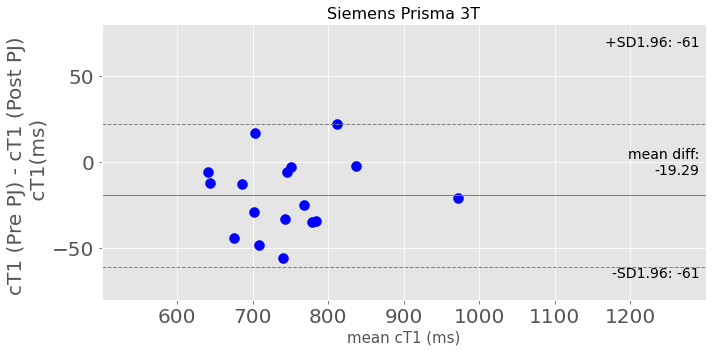

In [38]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"blue", 's':100})
ax.set_ylabel("cT1 (Pre PJ) - cT1 (Post PJ) \n cT1(ms)", fontsize = 20)
ax.set_title("Siemens Prisma 3T", fontsize = 16)
ax.set_xlim(500,1300)
ax.set_ylim(-80,80)
ax.set_xticks([600, 700, 800, 900, 1000, 1100, 1200])
ax.set_yticks([-50, 0, 50])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('mean cT1 (ms)')
plt.tight_layout()
#plt.savefig("PA cT1 Bland Altman Nov 10.png")

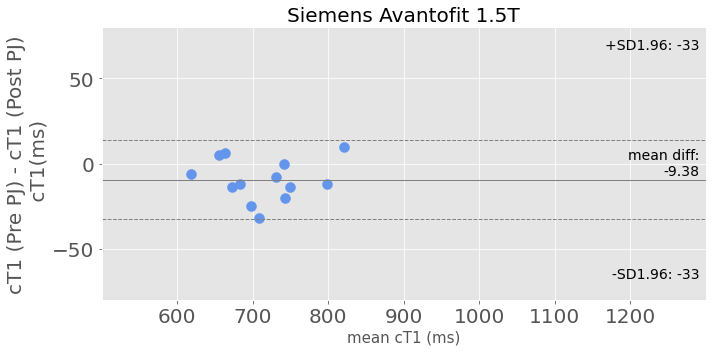

In [39]:
# Plot Bland Altman plots 
# https://stackoverflow.com/questions/16399279/bland-altman-plot-in-python
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"cornflowerblue", 's':100})
ax.set_xlim(500,1300)
ax.set_ylim(-80,80)
ax.set_xticks([600, 700, 800, 900, 1000, 1100, 1200])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yticks([-50, 0, 50])
ax.set_ylabel("cT1 (Pre PJ) - cT1 (Post PJ)\n cT1(ms)", fontsize = 20)
ax.set_title("Siemens Avantofit 1.5T", fontsize = 20)
ax.set_xlabel('mean cT1 (ms)')
plt.tight_layout() 
#plt.savefig("AV cT1 Bland Altman Nov 10.png")

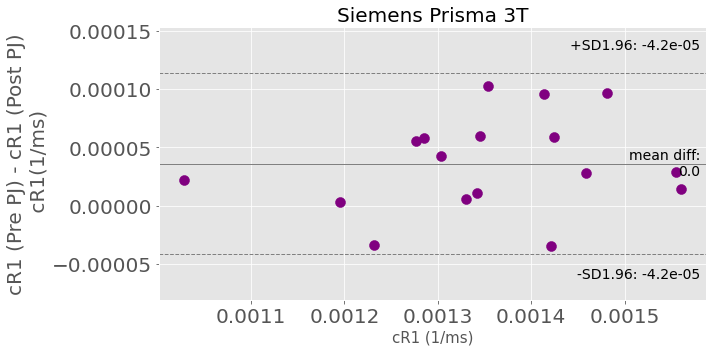

In [40]:
# Bland Altman analysis with Delta R1 for 3T Prisma data
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"purple", 's':100})
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylabel("cR1 (Pre PJ) - cR1 (Post PJ)\n cR1(1/ms)", fontsize = 20)
ax.set_title("Siemens Prisma 3T", fontsize = 20)
ax.set_xlabel('cR1 (1/ms)')
plt.tight_layout()
#plt.savefig("")

/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_19516/1063900487.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0.0012, 0.00125, 0.0013, 0.00135, 0.0014, 0.00145, 0.0015, 0.00155 ,0.0016], rotation = 45, ha = 'left')


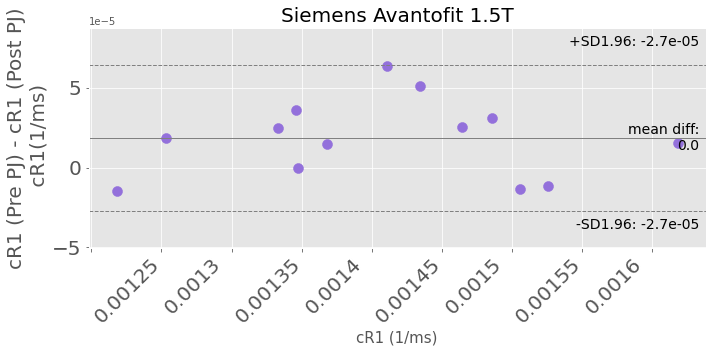

In [41]:
# Bland Altman analysis with Delta R1 for 1.5T Prisma data
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"mediumpurple", 's':100})
ax.set_xticklabels([0.0012, 0.00125, 0.0013, 0.00135, 0.0014, 0.00145, 0.0015, 0.00155 ,0.0016], rotation = 45, ha = 'left')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylabel("cR1 (Pre PJ) - cR1 (Post PJ)\n cR1(1/ms)", fontsize = 20)
ax.set_title("Siemens Avantofit 1.5T", fontsize = 20)
ax.set_xlabel('cR1 (1/ms)')
plt.tight_layout()
#plt.savefig("")

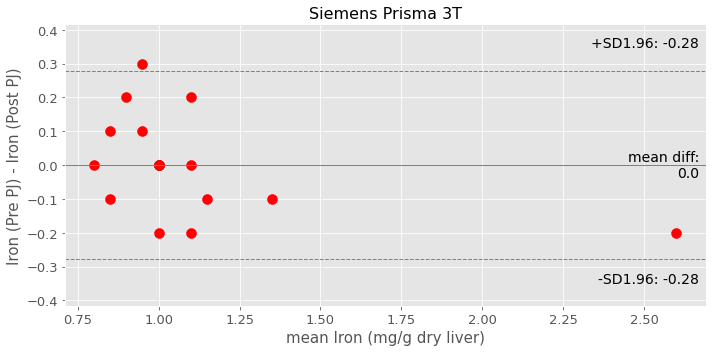

In [42]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(PA['Iron median (Pre PJ)'], PA['Iron median (Post PJ)'],  ax = ax, scatter_kwds = {'color':'red', 's': 100})
ax.set_ylabel('Iron (Pre PJ) - Iron (Post PJ)')
ax.set_title('Siemens Prisma 3T', fontsize = 16)
ax.set_xlabel('mean Iron (mg/g dry liver)')
plt.tight_layout()
#plt.savefig('PA Iron Bland Altman.png')

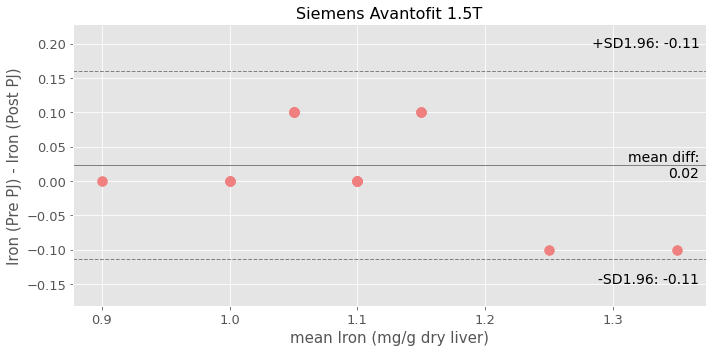

In [43]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(AV['Iron median (Pre PJ)'], AV['Iron median (Post PJ)'],  ax = ax, scatter_kwds = {'color':'lightcoral', 's':100})
ax.set_ylabel('Iron (Pre PJ) - Iron (Post PJ)')
ax.set_title('Siemens Avantofit 1.5T', fontsize = 16)
ax.set_xlabel('mean Iron (mg/g dry liver)')
plt.tight_layout()
#plt.savefig('AV Iron Bland Altman.png')

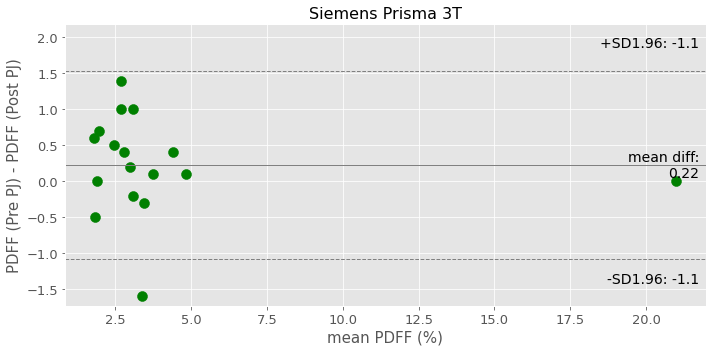

In [44]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(PA['PDFF median (Pre PJ)'], PA['PDFF median (Post PJ)'],  ax = ax, scatter_kwds = {'color':'green', 's':100})
ax.set_ylabel('PDFF (Pre PJ) - PDFF (Post PJ)')
ax.set_title('Siemens Prisma 3T', fontsize = 16)
ax.set_xlabel('mean PDFF (%)')
plt.tight_layout()
#plt.savefig('PA PDFF Bland Altman.png')

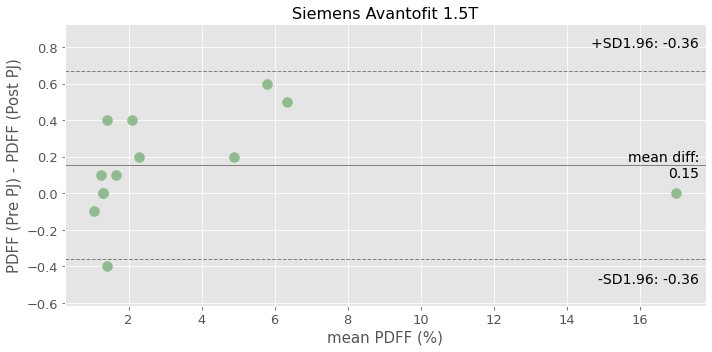

In [45]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (10, 5))
sm.graphics.mean_diff_plot(AV['PDFF median (Pre PJ)'], AV['PDFF median (Post PJ)'],  ax = ax, scatter_kwds = {'color':'darkseagreen', 's':100})
ax.set_ylabel('PDFF (Pre PJ) - PDFF (Post PJ)')
ax.set_title('Siemens Avantofit 1.5T', fontsize = 16)
ax.set_xlabel('mean PDFF (%)')
plt.tight_layout()
#3plt.savefig('AV PDFF Bland Altman.png')

# Repeatability Experiment

In [46]:
#TODO: Import the repeatability dataset


A previously conducted repeatability analysis was used to support interpreting the PJ experiment’s clinical relevance, specifically regarding the cT1 changes in the PJ experiment after the paired two-sided T test results. In the repeatability analysis, 55 participants were recruited to undergo two identical consecutive quantitative MR acquisitions in the liver (in-out-in scanner) with no PJ. Amongst the 55 participants, 30 and 25 participants were scanned on the Siemens MAGNETOM Avanto-fit 1.5T scanner and on the Siemens MAGNETOM Prisma 3T scanner, respectively. Bland-Altman analysis was performed on the cT1 values for both the repeatability analysis and the pineapple juice experiment. The derived Bland-Altman 95% limits of agreements (LoA) from both experiments were compared - the 95% limits of agreements were presented as dotted line in the figures below. The participants who underwent pineapple juice experiment were a subset of participants in the repeatability experiment. The main difference between these two experiments' set up is whether pineapple juice was introduced prior to the second scan.

The figure below shows the Bland Altman plots for the pineapple juice experiment (left) and the repeatability experiment(right) under 3T scans.  Effectively, the LOA in the repeatability represents measurement variation. The LOA (Pre PJ – Post PJ) for liver cT1 in the PJ experiment (-60.72ms to 22.14ms at 3T) were within those of the repeatability experiment (-1-76.9ms to 52.9ms at 3T).
![cT1_3T_PJ_vs_Repeatability](VendorSpecificPlots/cT1_3T_PJ_vs_Repeatability.png)

The figure below shows the Bland Altman plots for the pineapple juice experiment (left) and the repeatability experiment(right) under 1.5T scans.The LOA (Pre PJ – Post PJ) for liver cT1 in the PJ experiment (-32.73ms to 13.97ms at 1.5T) were within those of the repeatability experiment (-46.2ms to 16.1ms at 1.5T).
![cT1_1_5T_PJ_vs_Repeatability](VendorSpecificPlots/cT1_1_5T_PJ_vs_Repeatability.png)

# Discussion & Limitation

### cR1 is more appropriate than cT1 to interpret the result
The information of cR1 was derived from taking direct reciprocal from the cT1 value. The reason of deriving this value it to address the phenomenon that initial T1 was found to correlate with delta T1 (change in T1). However this phenomena was not found in R1 (reciprocal of T1 ) values. Please refer to Bluemke, E, Stride, E, Bulte, DP. A simplified empirical model to estimate oxygen relaxivity at different magnetic fields. NMR in Biomedicine. 2022 for more information. The scatter plots below (coupled with linear regression coefficient) show that the scale of plotting can affect the interpretation of final results. At the top row, the scale of the plot was manually adjusted; at the bottom row, the scale of plots were automatically adjusted to the dataset by Python. The top row showed that the change in cR1 showed to correlate with initial cR1 but changes in cT1 do not correlate with initial cT1. However, the bottom row showed no visible correlation. Interpreting results based on cR1 allow researchers to reduce the confounding effect of the baseline status of the participants’ liver metrics.

In [47]:
PA['cR1 median (Pre PJ)'] = 1/PA['cT1 median (Pre PJ)']
PA['cR1 median (Post PJ)'] = 1/PA['cT1 median (Post PJ)']
PA

,Record Id,Age,BMI,Condition,EXP number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1 Ref Upper,cT1 Ref Lower,Iron Ref,PDFF Ref,Vendor model,Field strength,EXP number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cR1 median (Pre PJ),cR1 median (Post PJ),cT1 Dif,cR1 Dif,Iron Dif,PDFF Dif,median_cT1Diff,median_cR1Diff,median_IronDiff,median_PDFFDiff,mean_cT1Diff,mean_cR1Diff,mean_IronDiff,mean_PDFFDiff
0,EXP010_002,NaN,NaN,Healthy,EXP010vhobplp,654.0,1.1,4.9,626.0,695.0,1.1,1.2,3.9,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010kfnnfem,698.0,1.2,4.8,668.0,735.0,1.1,1.2,3.8,5.9,0.001529,0.001433,44.0,-0.000096,0.1,-0.1,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
2,EXP010_004,NaN,NaN,Healthy,EXP010vkcrjqc,836.0,1.0,1.9,808.0,881.0,1.0,1.1,1.1,2.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010ooxyfwn,838.0,0.8,1.9,810.0,881.0,0.8,0.8,1.1,2.7,0.001196,0.001193,2.0,-0.000003,-0.2,0.0,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
4,EXP010_006,NaN,NaN,Healthy,EXP010vuvdody,638.0,1.1,3.6,614.0,675.0,1.0,1.2,2.4,4.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010ochlmjx,644.0,1.1,2.6,616.0,678.0,1.1,1.2,1.6,3.8,0.001567,0.001553,6.0,-0.000015,0.0,-1.0,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
6,EXP010_008,NaN,NaN,Healthy,EXP010wktzdls,823.0,0.9,1.6,780.0,861.0,0.9,1.0,0.9,2.4,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010olbctkw,801.0,0.8,2.1,764.0,842.0,0.8,0.9,1.3,3.1,0.001215,0.001248,-22.0,0.000033,-0.1,0.5,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
8,EXP010_011,34.0,35.92,NAFLD/NASH,EXP010wlnocav,962.0,1.3,21.0,883.0,103.0,1.3,1.4,20.0,-23.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010oyklrkq,983.0,1.4,21.0,917.0,104.0,1.3,1.4,19.0,-22.0,0.001040,0.001017,21.0,-0.000022,0.1,0.0,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
9,EXP010_012,61.0,27.73,PBC,EXP010wrtonqh,688.0,1.0,3.4,664.0,722.0,1.0,1.0,1.5,5.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010pzugyag,717.0,1.0,2.0,692.0,749.0,1.0,1.0,0.9,3.3,0.001453,0.001395,29.0,-0.000059,0.0,-1.4,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
11,EXP010_014,NaN,NaN,Healthy,EXP010xresjqh,712.0,1.0,3.1,683.0,753.0,0.9,1.2,1.9,4.5,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010pbukhnp,695.0,1.0,2.9,668.0,732.0,1.0,1.1,1.9,4.2,0.001404,0.001439,-17.0,0.000034,0.0,-0.2,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
12,EXP010_015,NaN,NaN,Healthy,EXP010xukgukr,684.0,1.0,2.6,660.0,719.0,1.0,1.1,1.5,3.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010pgarsgq,732.0,1.2,4.2,700.0,770.0,1.0,1.3,2.6,5.7,0.001462,0.001366,48.0,-0.000096,0.2,1.6,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
16,EXP010_019,57.0,27.99,NAFLD/NASH,EXP010xsnkfaa,637.0,2.5,4.6,604.0,711.0,2.3,2.7,3.2,6.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010pyrnfmw,649.0,2.7,4.2,614.0,723.0,2.2,2.9,2.7,5.8,0.001570,0.001541,12.0,-0.000029,0.2,-0.4,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22
17,EXP010_020,NaN,NaN,Healthy,EXP010xyhlgie,742.0,1.0,3.8,717.0,777.0,0.9,1.0,2.6,4.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,EXP010qgnaouz,748.0,0.9,3.7,723.0,783.0,0.8,0.9,2.7,4.8,0.001348,0.001337,6.0,-0.000011,-0.1,-0.1,21.0,-0.0,0.0,-0.2,19.29,-0.0,0.0,-0.22


Both delta cR1 and delta cT1 had poor corelation coefficients against their initial value under 3T. However the scale of the plots impacts the decision of choosing the metric to report analysed results with.


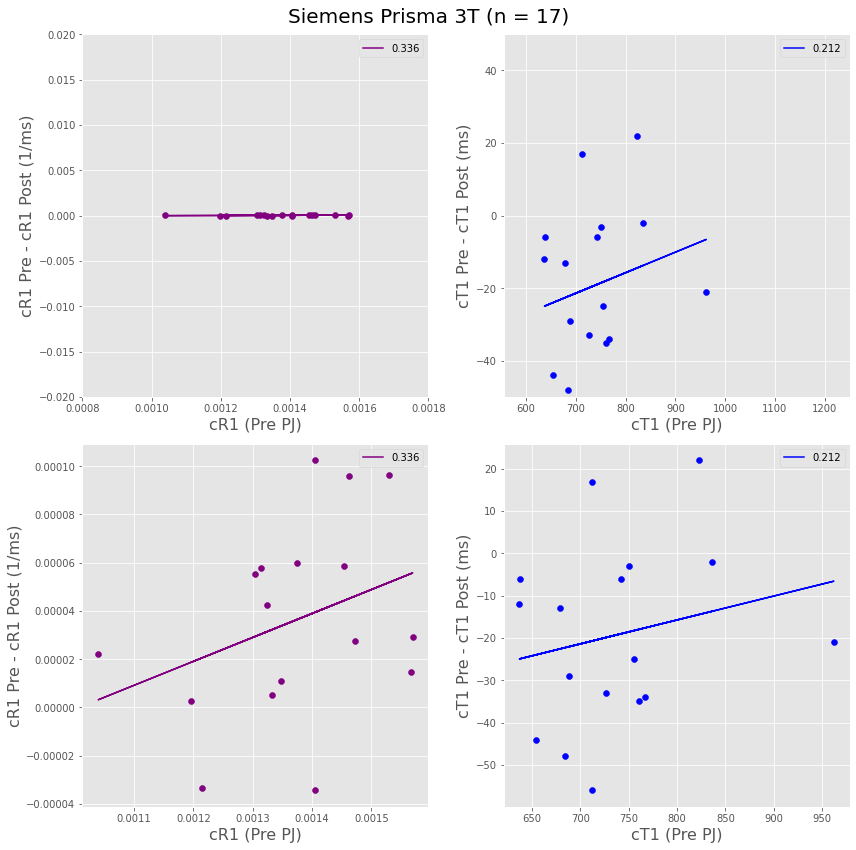

In [48]:
# Delta cR1 against native cR1
plt.style.use('ggplot')
PA['delta cR1'] = PA["cR1 median (Pre PJ)"]- PA["cR1 median (Post PJ)"]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

m, b = np.polyfit(PA["cR1 median (Pre PJ)"], PA['delta cR1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(PA["cR1 median (Pre PJ)"], PA['delta cR1'])
axes[0, 0].scatter(PA["cR1 median (Pre PJ)"], PA['delta cR1'], color = 'purple')
axes[0, 0].plot(PA["cR1 median (Pre PJ)"], m*PA["cR1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)) , color = 'purple')
axes[0, 0].legend(loc = 'best')
axes[0, 0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[0, 0].set_ylabel("cR1 Pre - cR1 Post (1/ms)", fontsize = 16)
axes[0, 0].set_xlim(0.0008,0.0018)
axes[0, 0].set_ylim(-0.02,0.02)

# Delta cT1 against native cT1
PA['delta cT1'] = PA["cT1 median (Pre PJ)"]- PA["cT1 median (Post PJ)"]

m, b = np.polyfit(PA["cT1 median (Pre PJ)"], PA['delta cT1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(PA["cT1 median (Pre PJ)"], PA['delta cT1'])
axes[0, 1].scatter(PA["cT1 median (Pre PJ)"], PA['delta cT1'], color = 'blue')
axes[0, 1].plot(PA["cT1 median (Pre PJ)"], m*PA["cT1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)), color = 'blue')
axes[0, 1].legend(loc = 'best')
axes[0, 1].set_xlabel('cT1 (Pre PJ)',  fontsize = 16)
axes[0, 1].set_ylabel("cT1 Pre - cT1 Post (ms)", fontsize = 16)
axes[0, 1].set_xlim(555,1250)
axes[0, 1].set_ylim(-50,50)


m, b = np.polyfit(PA["cR1 median (Pre PJ)"], PA['delta cR1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(PA["cR1 median (Pre PJ)"], PA['delta cR1'])
axes[1, 0].scatter(PA["cR1 median (Pre PJ)"], PA['delta cR1'], color = 'purple')
axes[1, 0].plot(PA["cR1 median (Pre PJ)"], m*PA["cR1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)) , color = 'purple')
axes[1, 0].legend(loc = 'best')
axes[1, 0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[1, 0].set_ylabel("cR1 Pre - cR1 Post (1/ms)", fontsize = 16)


# Delta cT1 against native cT1
PA['delta cT1'] = PA["cT1 median (Pre PJ)"]- PA["cT1 median (Post PJ)"]

m, b = np.polyfit(PA["cT1 median (Pre PJ)"], PA['delta cT1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(PA["cT1 median (Pre PJ)"], PA['delta cT1'])
axes[1, 1].scatter(PA["cT1 median (Pre PJ)"], PA['delta cT1'], color = 'blue')
axes[1, 1].plot(PA["cT1 median (Pre PJ)"], m*PA["cT1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)), color = 'blue')
axes[1, 1].legend(loc = 'best')
axes[1, 1].set_xlabel('cT1 (Pre PJ)',  fontsize = 16)
axes[1, 1].set_ylabel("cT1 Pre - cT1 Post (ms)", fontsize = 16)

print('Both delta cR1 and delta cT1 had poor corelation coefficients against their initial value under 3T. However the scale of the plots impacts the decision of choosing the metric to report analysed results with.')
plt.tight_layout()

Both delta cR1 and delta cT1 had poor corelation coefficients against their initial value under 1.5T


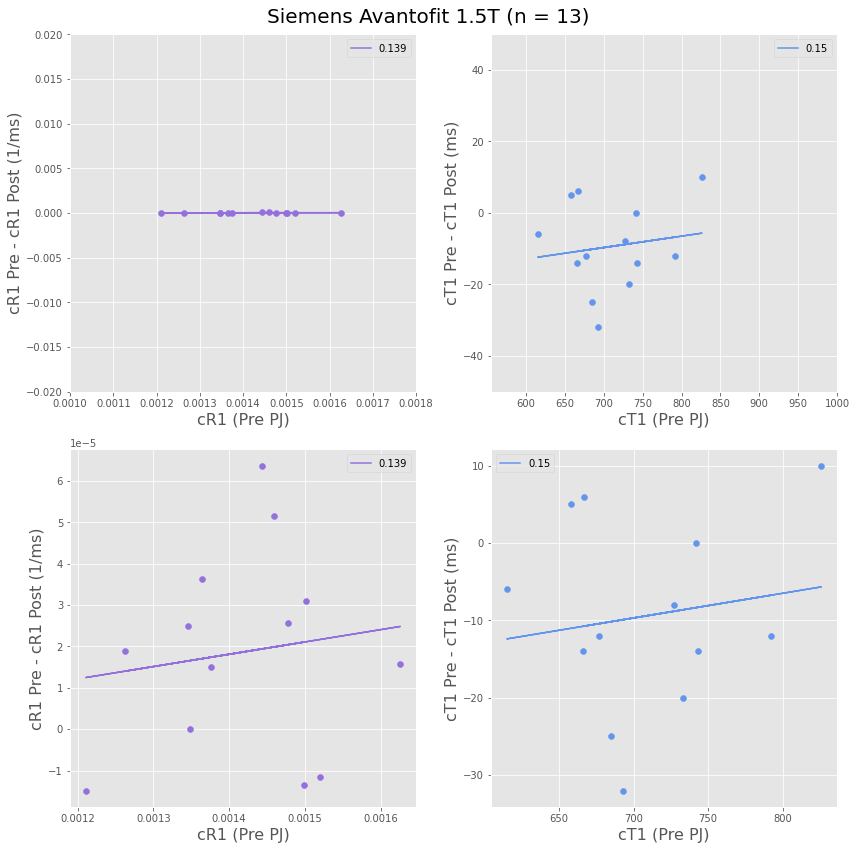

In [49]:
# Delta cR1 against native cR1 for 1.5T
plt.style.use('ggplot')
AV['delta cR1'] = AV["cR1 median (Pre PJ)"]- AV["cR1 median (Post PJ)"]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

m, b = np.polyfit(AV["cR1 median (Pre PJ)"], AV['delta cR1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(AV["cR1 median (Pre PJ)"], AV['delta cR1'])
axes[0, 0].scatter(AV["cR1 median (Pre PJ)"], AV['delta cR1'], color = 'mediumpurple')
axes[0, 0].plot(AV["cR1 median (Pre PJ)"], m*AV["cR1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)) , color = 'mediumpurple')
axes[0, 0].legend(loc = 'best')
axes[0, 0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[0, 0].set_ylabel("cR1 Pre - cR1 Post (1/ms)", fontsize = 16)
axes[0, 0].set_xlim(0.0010,0.0018)
axes[0, 0].set_ylim(-0.02,0.02)


# Delta cT1 against native cT1
AV['delta cT1'] = AV["cT1 median (Pre PJ)"]- AV["cT1 median (Post PJ)"]

m, b = np.polyfit(AV["cT1 median (Pre PJ)"], AV['delta cT1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(AV["cT1 median (Pre PJ)"], AV['delta cT1'])
axes[0, 1].scatter(AV["cT1 median (Pre PJ)"], AV['delta cT1'], color = 'cornflowerblue')
axes[0, 1].plot(AV["cT1 median (Pre PJ)"], m*AV["cT1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)), color = 'cornflowerblue')
axes[0, 1].legend(loc = 'best')
axes[0, 1].set_xlabel('cT1 (Pre PJ)',  fontsize = 16)
axes[0, 1].set_ylabel("cT1 Pre - cT1 Post (ms)", fontsize = 16)
axes[0, 1].set_xlim(555,1000)
axes[0, 1].set_ylim(-50,50)


m, b = np.polyfit(AV["cR1 median (Pre PJ)"], AV['delta cR1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(AV["cR1 median (Pre PJ)"], AV['delta cR1'])
axes[1, 0].scatter(AV["cR1 median (Pre PJ)"], AV['delta cR1'], color = 'mediumpurple')
axes[1, 0].plot(AV["cR1 median (Pre PJ)"], m*AV["cR1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)) , color = 'mediumpurple')
axes[1, 0].legend(loc = 'best')
axes[1, 0].set_xlabel('cR1 (Pre PJ)',  fontsize = 16)
axes[1, 0].set_ylabel("cR1 Pre - cR1 Post (1/ms)", fontsize = 16)



# Delta cT1 against native cT1
AV['delta cT1'] = AV["cT1 median (Pre PJ)"]- AV["cT1 median (Post PJ)"]

m, b = np.polyfit(AV["cT1 median (Pre PJ)"], AV['delta cT1'], 1) # obtain m(slope) and b(intercept) of libear regression line
res = stats.linregress(AV["cT1 median (Pre PJ)"], AV['delta cT1'])
axes[1, 1].scatter(AV["cT1 median (Pre PJ)"], AV['delta cT1'], color = 'cornflowerblue')
axes[1, 1].plot(AV["cT1 median (Pre PJ)"], m*AV["cT1 median (Pre PJ)"]+b, label = str(res.rvalue.round(3)), color = 'cornflowerblue')
axes[1, 1].legend(loc = 'best')
axes[1, 1].set_xlabel('cT1 (Pre PJ)',  fontsize = 16)
axes[1, 1].set_ylabel("cT1 Pre - cT1 Post (ms)", fontsize = 16)
plt.tight_layout()
print('Both delta cR1 and delta cT1 had poor corelation coefficients against their initial value under 1.5T')

However, we would also like to point out the fact that the linear correlation coefficients demonstrated in graphs above did not show strong correlation between the changes in cT1 and initial cT1. This can be due to the fact cT1 scale measured in this pineapple juice experiment, comparing Bluemke et al.'s work, is very small. Therefore, future work should aim to include a much larger range of liver metrics from in-vivo participants. 


### The sample size is too small
Even though pulled analysis also did not show the pineapple juice gave significant impact on the differences of 
metrics pre and post. There were less than 20 subjects for each arm of field strength. It is also difficult to conduct TOAST test to define effective size of participant to collect because, to perform TOAST test, a sound experience with the question of interest is needed to decide the alpha value to discriminate between results from the TOAST test.
Future studies should include more participant and conducted an equivalent test to justify for sample size.
![Small_Sample_Size](VendorSpecificPlots/Small_Sample_Size.png)

### Non control of quantification

The final conclusion drawn by collectively considering pineapple juice experiment and repeatability experiment showed that the changes found in pineapple juice dataset is smaller than the measurement variation and therefore it is not clinical relevant. Even though the 

The acquisition of the datasets for both repeatability and pineapple juice experiments were acquired roughly around the same time. However, the derivation of the metrics were conducted at different timepoints.  
In repeatability experiment (2018), the metrics were derived from trained analysts, manually segmenting out liver in acquired slices. The processing was done in a blinded manner with the medical device LiverMultiScan version 3.  In the pineapple juice experiment, metrics derivation was done automated process of segmentation, artefact detection and slice selection for quantification. Although the performance of the automatic processing algorithm was internally validated (achieve human-comparable robustness and judged by dice similarity score [DSC]). The variation found between human analysed case and automatically generated case is inevitable.

Future studies should be careful at designing analysis method. Ideally, the analysis mechanism should be the same. If not possible, re-analysis of repeatability experiment can be conducted to further improve the reliability of the drawn conclusion.


### Inhomogeneous participant 

The participant population comprises healthy volunteers, patients with liver disease but no biliary disease, and patients with biliary disease. Note that the reason for including both patient and volunteer data is to assess the full dynamic range of pineapple juice's effect on liver metrics (cT1, cR1, iron and PDFF). Note that the use "outliers" means that the quantified metric values fall outside the distribution of the acquired data. It does not necessarily mean it is caused by disease. However, the subgroup (pulling a set of participant for pineapple juice experiment) lead to a very small sample size. With outliers presented in the pineapple juice experiment dataset, the disease status drastically skew the distribution of measured metrics and therefore makes it difficult to draw solid conclusion. 

In the following section, 3 cases were specifically extracted as the outliers identified in this pineapple juice experiment with z-score analysis and graphic inspection(bar plots and box plots). They were all patients with confirmed non-alcoholic fatty liver disease(NAFLD) or non-alcoholic steatohepatitis (NASH) conditions.

Note that the use "outliers" means that the quantified metric values fall outside the distribution of the acquired data. It does not necessarily mean it is caused by disease.  Future studies can include a higher number of confirmed NAHS/NAFLD patients to more reliably filter out disease status’ confounding effect and to draw better conclusion of pineapple juice’s direct impact on liver metrics.

The following bar plots demonstrate the metric values for all participants who underwend PJ experiment with 3T scanner. The black dotted lines indicate the healthy reference range for each metric. Note that cR1 is derived metrics and therefore reference range for cR1 is not given in the plot. For the cT1 metric, there are three participants exceed healthy reference range (EXP010_004, EXP010_008, EXP010_011). One of them is considered outlier (EXP010_011) both before and after PJ ingestion; for the cR1 metric, there is one outlier (EXP010_011); for the Iron metric, there is one outlier (EXP010_019); For the PDFF metric, there is one outlier (EXP010_011)


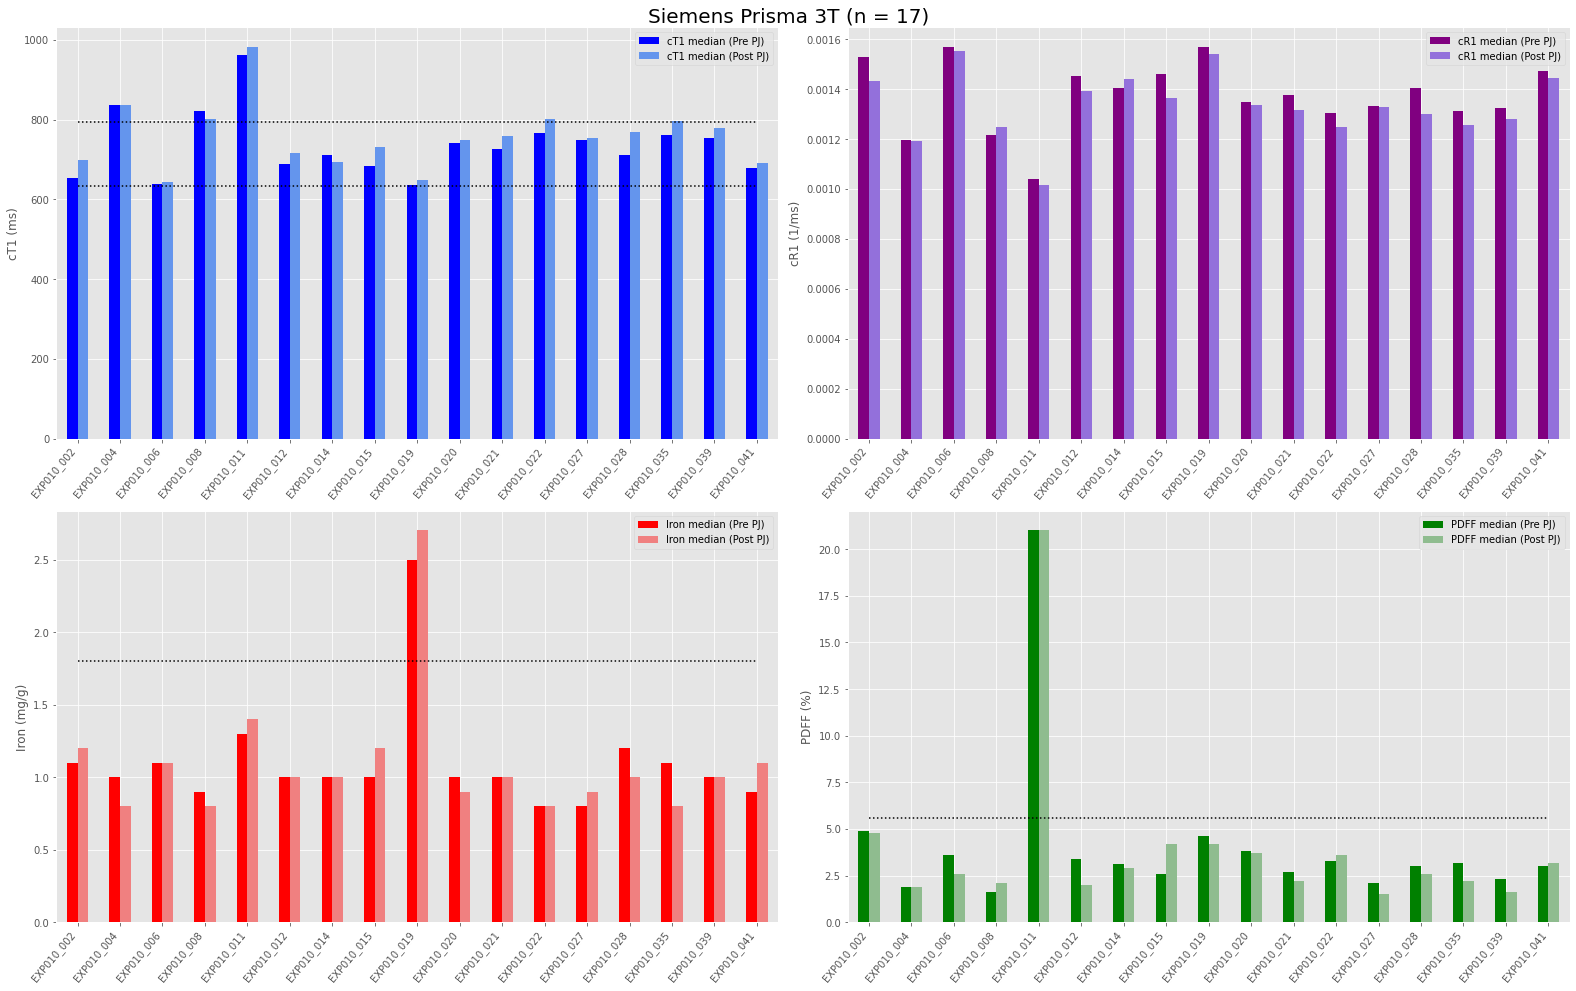

In [50]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,14))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

PA[['cT1 median (Pre PJ)', 'cT1 median (Post PJ)']].plot.bar(ax = axes[0,0], color = ['blue', 'cornflowerblue'])
axes[0, 0].plot(PA["Record Id"], PA["cT1 Ref Upper"], color = 'black', linestyle = ':')
axes[0, 0].plot(PA["Record Id"], PA["cT1 Ref Lower"], color = 'black', linestyle = ':')
axes[0, 0].set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
axes[0, 0].set_ylabel('cT1 (ms)')

PA[['cR1 median (Pre PJ)', 'cR1 median (Post PJ)']].plot.bar(ax = axes[0,1], color = ['purple', 'mediumpurple'])
axes[0,1].set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
axes[0,1].set_ylabel('cR1 (1/ms)')

PA[['Iron median (Pre PJ)', 'Iron median (Post PJ)']].plot.bar(ax = axes[1,0], color = ['red', 'lightcoral'])
axes[1,0].plot(PA["Record Id"], PA["Iron Ref"], color = 'black', linestyle = ':')
axes[1,0].set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
axes[1,0].set_ylabel('Iron (mg/g)')

PA[['PDFF median (Pre PJ)', 'PDFF median (Post PJ)']].plot.bar(ax = axes[1,1], color = ['green', 'darkseagreen'])
axes[1,1].plot(PA["Record Id"], PA["PDFF Ref"],color = 'black', linestyle = ':')
axes[1,1].set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
axes[1,1].set_ylabel('PDFF (%)')

plt.tight_layout()

print('The following bar plots demonstrate the metric values for all participants who underwend PJ experiment with 3T scanner. The black dotted lines indicate the healthy reference range for each metric. Note that cR1 is derived metrics and therefore reference range for cR1 is not given in the plot. For the cT1 metric, there are three participants exceed healthy reference range (EXP010_004, EXP010_008, EXP010_011). One of them is considered outlier (EXP010_011) both before and after PJ ingestion; for the cR1 metric, there is one outlier (EXP010_011); for the Iron metric, there is one outlier (EXP010_019); For the PDFF metric, there is one outlier (EXP010_011)')

The following bar plots demonstrate the metrics value for all participants who underwend PJ experiment with 1.5T scanner. For the PDFF metric, there is one outlier (EXP010_030). However, for the cT1, cR1 and iron metrics, it is hard to decided whether there is outlier even though in box plot. However, two participants had cT1 value exceeding healthy reference range (EXP010_005, EXP010_030). There is one outlier identified in the Iron (Pre PJ) group and 2 outliers in the Iron (Post PJ) group. A further z-score test is needed.


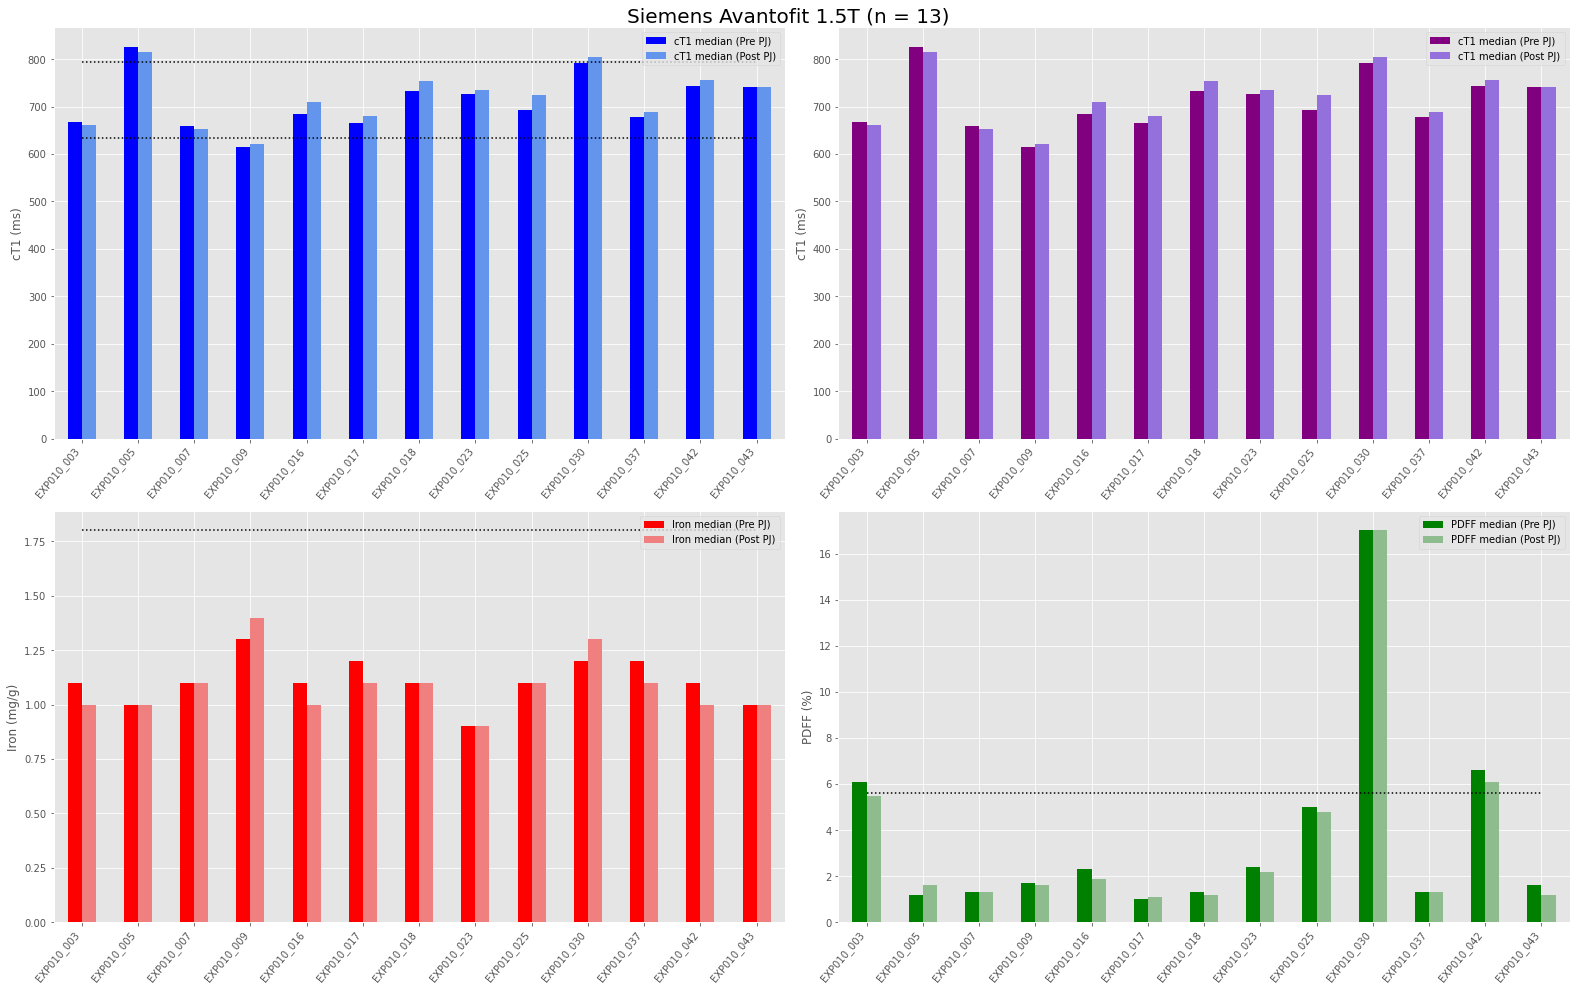

In [51]:

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,14))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

AV[['cT1 median (Pre PJ)', 'cT1 median (Post PJ)']].plot.bar(ax = axes[0,0], color = ['blue', 'cornflowerblue'])
axes[0, 0].plot(AV["Record Id"], AV["cT1 Ref Upper"], color = 'black', linestyle = ':')
axes[0, 0].plot(AV["Record Id"], AV["cT1 Ref Lower"], color = 'black', linestyle = ':')
axes[0,0].set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')
axes[0,0].set_ylabel('cT1 (ms)')

AV[['cT1 median (Pre PJ)', 'cT1 median (Post PJ)']].plot.bar(ax = axes[0,1], color = ['purple', 'mediumpurple'])
axes[0,1].set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')
axes[0,1].set_ylabel('cT1 (ms)')

AV[['Iron median (Pre PJ)', 'Iron median (Post PJ)']].plot.bar(ax = axes[1,0], color = ['red', 'lightcoral'])
axes[1,0].plot(AV["Record Id"], AV["Iron Ref"], color = 'black', linestyle = ':')
axes[1,0].set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')
axes[1,0].set_ylabel('Iron (mg/g)')

AV[['PDFF median (Pre PJ)', 'PDFF median (Post PJ)']].plot.bar(ax = axes[1,1], color = ['green', 'darkseagreen'])
axes[1,1].plot(AV["Record Id"], AV["PDFF Ref"],color = 'black', linestyle = ':')
axes[1,1].set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')
axes[1,1].set_ylabel('PDFF (%)')

plt.tight_layout()

print('The following bar plots demonstrate the metrics value for all participants who underwend PJ experiment with 1.5T scanner. For the PDFF metric, there is one outlier (EXP010_030). However, for the cT1, cR1 and iron metrics, it is hard to decided whether there is outlier even though in box plot. However, two participants had cT1 value exceeding healthy reference range (EXP010_005, EXP010_030). There is one outlier identified in the Iron (Pre PJ) group and 2 outliers in the Iron (Post PJ) group. A further z-score test is needed.')

To determin outliers, the zscore of each metric were calculated. Even though only cT1 follow normal distribution, we assume other dataset are also normally distributed and use  z-score to represent the number of standard deviation above and below the mean of the dataset under question. Outliers are defined as z-score greater than 3 or smaller than -3.

In [52]:
#calculate the z-score for 3T
PA_zscore = {
    'Record ID' : PA['Record Id'],
    'zscore_cT1_PrePJ' : abs(stats.zscore(PA["cT1 median (Pre PJ)"]))<3,
    'zscore_cT1_PostPJ' : abs(stats.zscore(PA["cT1 median (Post PJ)"]))<3,
    'zscore_cR1_PrePJ' : abs(stats.zscore(PA["cR1 median (Pre PJ)"]))<3,
    'zscore_cR1_PostPJ' : abs(stats.zscore(PA["cR1 median (Post PJ)"]))<3,
    'zscore_Iron_PrePJ' : abs(stats.zscore(PA["Iron median (Pre PJ)"]))<3,
    'zscore_Iron_PostPJ' : abs(stats.zscore(PA["Iron median (Post PJ)"]))<3,
    'zscore_PDFF_PrePJ' : abs(stats.zscore(PA["PDFF median (Pre PJ)"]))<3,
    'zscore_PDFF_PostPJ' : abs(stats.zscore(PA["PDFF median (Post PJ)"]))<3
    }
print('The table below represent the z-score diagnosis for the 3T data. The cell value in the table below is represented in the way that: "True" means the absolute z-score value is smaller than 3; "False" means the absolute z-score value is greater than 3, which signifies that value is an outlier. There is one outlier(EXP010_019) for the iron metric both before and after pineapple juice ingestion, and there is one outlier(EXP010_011) for the PDFF metric. For the cT1 and cR1 metric, the results of z-score diagnosis for outlier is different from visual inspection of the bar plots and box plots. This can be due to the fact that the calculation of z-score [z = (X-mu)/sigma] includes outlier in the process and therefore this method is sensitive to the presence of outliers.')
pd.DataFrame(data = PA_zscore)


The table below represent the z-score diagnosis for the 3T data. The cell value in the table below is represented in the way that: "True" means the absolute z-score value is smaller than 3; "False" means the absolute z-score value is greater than 3, which signifies that value is an outlier. There is one outlier(EXP010_019) for the iron metric both before and after pineapple juice ingestion, and there is one outlier(EXP010_011) for the PDFF metric. For the cT1 and cR1 metric, the results of z-score diagnosis for outlier is different from visual inspection of the bar plots and box plots. This can be due to the fact that the calculation of z-score [z = (X-mu)/sigma] includes outlier in the process and therefore this method is sensitive to the presence of outliers.


,Record ID,zscore_cT1_PrePJ,zscore_cT1_PostPJ,zscore_cR1_PrePJ,zscore_cR1_PostPJ,zscore_Iron_PrePJ,zscore_Iron_PostPJ,zscore_PDFF_PrePJ,zscore_PDFF_PostPJ
0,EXP010_002,True,True,True,True,True,True,True,True
2,EXP010_004,True,True,True,True,True,True,True,True
4,EXP010_006,True,True,True,True,True,True,True,True
6,EXP010_008,True,True,True,True,True,True,True,True
8,EXP010_011,True,True,True,True,True,True,False,False
9,EXP010_012,True,True,True,True,True,True,True,True
11,EXP010_014,True,True,True,True,True,True,True,True
12,EXP010_015,True,True,True,True,True,True,True,True
16,EXP010_019,True,True,True,True,False,False,True,True
17,EXP010_020,True,True,True,True,True,True,True,True


In [53]:

#calculate the z-score for 1.5T
AV_zscore = {
    'Record ID' : AV['Record Id'],
    'zscore_cT1_PrePJ' : abs(stats.zscore(AV["cT1 median (Pre PJ)"]))<3,
    'zscore_cT1_PostPJ' : abs(stats.zscore(AV["cT1 median (Post PJ)"]))<3,
    'zscore_cR1_PrePJ' : abs(stats.zscore(AV["cR1 median (Pre PJ)"]))<3,
    'zscore_cR1_PostPJ' : abs(stats.zscore(AV["cR1 median (Post PJ)"]))<3,
    'zscore_Iron_PrePJ' : abs(stats.zscore(AV["Iron median (Pre PJ)"]))<3,
    'zscore_Iron_PostPJ' : abs(stats.zscore(AV["Iron median (Post PJ)"]))<3,
    'zscore_PDFF_PrePJ' : abs(stats.zscore(AV["PDFF median (Pre PJ)"]))<3,
    'zscore_PDFF_PostPJ' : abs(stats.zscore(AV["PDFF median (Post PJ)"]))<3
    }
print('The table below represent the z-score diagnosis for the 3T data. The cell value in the table below is represented in the way that: "True" means the absolute z-score value is smaller than 3; "False" means the absolute z-score value is greater than 3, which signifies that value is an outlier. The table below shows that for the 1.5T data, there is one outlier(EXP010_030) both before and after pineapple juice ingestion, and no outliers were found for the cT1, cR1 and iron metrics. The z-score diagnosis for outlier on the 1.5T data reveal the same results as the visual inspection of the box plots and bar plots.')
pd.DataFrame(data = AV_zscore)


The table below represent the z-score diagnosis for the 3T data. The cell value in the table below is represented in the way that: "True" means the absolute z-score value is smaller than 3; "False" means the absolute z-score value is greater than 3, which signifies that value is an outlier. The table below shows that for the 1.5T data, there is one outlier(EXP010_030) both before and after pineapple juice ingestion, and no outliers were found for the cT1, cR1 and iron metrics. The z-score diagnosis for outlier on the 1.5T data reveal the same results as the visual inspection of the box plots and bar plots.


,Record ID,zscore_cT1_PrePJ,zscore_cT1_PostPJ,zscore_cR1_PrePJ,zscore_cR1_PostPJ,zscore_Iron_PrePJ,zscore_Iron_PostPJ,zscore_PDFF_PrePJ,zscore_PDFF_PostPJ
1,EXP010_003,True,True,True,True,True,True,True,True
3,EXP010_005,True,True,True,True,True,True,True,True
5,EXP010_007,True,True,True,True,True,True,True,True
7,EXP010_009,True,True,True,True,True,True,True,True
13,EXP010_016,True,True,True,True,True,True,True,True
14,EXP010_017,True,True,True,True,True,True,True,True
15,EXP010_018,True,True,True,True,True,True,True,True
20,EXP010_023,True,True,True,True,True,True,True,True
22,EXP010_025,True,True,True,True,True,True,True,True
27,EXP010_030,True,True,True,True,True,True,False,False


In [54]:
# Collect the records that are outliers 
filt = ['EXP010_011', 'EXP010_019', 'EXP010_030']
outlier_df = drop_columns[drop_columns['Record Id'].isin(filt)].drop(columns=['EXP number (Pre PJ)', 'EXP number (Post PJ)', 'cT1 Q1 (Pre PJ)', 'cT1 Q3 (Pre PJ)', 'Iron Q1 (Pre PJ)', 'Iron Q3 (Pre PJ)', 'PDFF Q1 (Pre PJ)', 'PDFF Q3 (Pre PJ)', 'cT1 Q1 (Post PJ)', 'cT1 Q3 (Post PJ)', 'Iron Q1 (Post PJ)', 'Iron Q3 (Post PJ)', 'PDFF Q1 (Post PJ)', 'PDFF Q3 (Post PJ)']).set_index('Record Id')

# Calculate the 'excess amount' of 'metrics' for 'outliers', EA_metric_outlier
EA_cT1_Pre_EX011 = (outlier_df['cT1 median (Pre PJ)']['EXP010_011'] - outlier_df['cT1 Ref Upper']['EXP010_011']).round(2)
EA_cT1_Post_EX011 = (outlier_df['cT1 median (Post PJ)']['EXP010_011'] - outlier_df['cT1 Ref Upper']['EXP010_011']).round(2)
EA_PDFF_Pre_EX011 = (outlier_df['PDFF median (Pre PJ)']['EXP010_011'] - outlier_df['PDFF Ref']['EXP010_011']).round(2)
EA_PDFF_Post_EX011 = (outlier_df['PDFF median (Post PJ)']['EXP010_011'] - outlier_df['PDFF Ref']['EXP010_011']).round(2)
EA_Iron_Pre_EX019 = (outlier_df['Iron median (Pre PJ)']['EXP010_019'] - outlier_df['Iron Ref']['EXP010_019']).round(2)
EA_Iron_Post_EX019 = (outlier_df['Iron median (Post PJ)']['EXP010_019'] - outlier_df['Iron Ref']['EXP010_019']).round(2)
EA_PDFF_Pre_EX030 = (outlier_df['PDFF median (Pre PJ)']['EXP010_030'] - outlier_df['PDFF Ref']['EXP010_030']).round(2)
EA_PDFF_Post_EX030 = (outlier_df['PDFF median (Post PJ)']['EXP010_030'] - outlier_df['PDFF Ref']['EXP010_030']).round(2)

# Summary
print('The table below summarise the three outliers identified with z-score and graphing analysis. They were all patients with confirmed non-alcoholic fatty liver disease(NAFLD) or non-alcoholic steatohepatitis (NASH) conditions.')
print('For case EXP010_011, the cT1 metrics exceed the healthy reference range by', EA_cT1_Pre_EX011 ,'and', EA_cT1_Post_EX011,'(ms) before and after pineapple juice ingestion respectively; the PDFF metrics exceed the healthy reference range by', EA_PDFF_Pre_EX011, 'and', EA_PDFF_Post_EX011,'(%) before and after pineapple juice ingestion respectively.')
print('For case EXP010_019, the iron metrics exceed the healthy reference range by', EA_Iron_Pre_EX019 ,'and', EA_Iron_Post_EX019,'(mg/g) before and after pineapple juice ingestion respectively.') 
print('For case EXP010-030, the PDFF metrics exceed the healthy reference range by', EA_PDFF_Pre_EX030, 'and', EA_PDFF_Post_EX030,'(%) before and after pineapple juice ingestion respectively.')

outlier_df

The table below summarise the three outliers identified with z-score and graphing analysis. They were all patients with confirmed non-alcoholic fatty liver disease(NAFLD) or non-alcoholic steatohepatitis (NASH) conditions.
For case EXP010_011, the cT1 metrics exceed the healthy reference range by 329.0 and 350.0 (ms) before and after pineapple juice ingestion respectively; the PDFF metrics exceed the healthy reference range by 15.4 and 15.4 (%) before and after pineapple juice ingestion respectively.
For case EXP010_019, the iron metrics exceed the healthy reference range by 0.7 and 0.9 (mg/g) before and after pineapple juice ingestion respectively.
For case EXP010-030, the PDFF metrics exceed the healthy reference range by 11.4 and 11.4 (%) before and after pineapple juice ingestion respectively.


,Age,BMI,Condition,cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Ref Upper,cT1 Ref Lower,Iron Ref,PDFF Ref,Vendor model,Field strength,cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ)
Record Id,,,,,,,,,,,,,,,
EXP010_011,34.0,35.92,NAFLD/NASH,962.0,1.3,21.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,983.0,1.4,21.0
EXP010_019,57.0,27.99,NAFLD/NASH,637.0,2.5,4.6,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T,649.0,2.7,4.2
EXP010_030,39.0,28.66,NAFLD/NASH,792.0,1.2,17.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,1.5T,804.0,1.3,17.0


The figure below depicts the metric maps for these three identified outliers.
![Outliers_Maps](VendorSpecificPlots/Outliers_Maps.png)

In [55]:
#TODO: ask Dan what is the extended value of reporting the cT1, iron metrics that falls outside healthy reference range. Because I am not sure about this information explain any of pineapple juice effect, or the experience that formaer researchers found the 2nd time cT1 is usually higher than the 1st time.

#### Find graphical represent for conclusion: No difference after pineapple juice

In [56]:
# Find out the median value for each metric on the non-outlier dataframe and groupby field strength
rep = rm_outlier_df.groupby('Field strength').median().drop(columns=['Age', 'BMI', 'cT1 Q1 (Pre PJ)', 'cT1 Q3 (Pre PJ)','Iron Q1 (Pre PJ)', 'Iron Q3 (Pre PJ)', 'PDFF Q1 (Pre PJ)','PDFF Q3 (Pre PJ)', 'cT1 Ref Upper', 'cT1 Ref Lower', 'Iron Ref','PDFF Ref', 'cT1 Q1 (Post PJ)', 'cT1 Q3 (Post PJ)','Iron Q1 (Post PJ)', 'Iron Q3 (Post PJ)', 'PDFF Q1 (Post PJ)','PDFF Q3 (Post PJ)'])

# compare the rep dataframe to PA and AV dataframe and select the representative record for each field strength
rep['Representative'] = ['EXP010_016', 'EXP010_021']

print('The following table summarises the he median value for each metric on the non-outlier dataframe grouped by field strength. Note that the 1.5T non-outlier dataset consist of 12 records and there for the median value of the metrics were the averaged from the two values closet to median. For 1.5T dataset, we choose the case EXP010_016 as representative of the whole non-outlier median. For 3T dataset, we choose the case EXP010_021 as representative of the whole non-outlier median.')
rep

# PA[PA['Record Id'] == 'EXP010_021']
# AV[AV['Record Id'] == 'EXP010_016']

NameError: name 'rm_outlier_df' is not defined

In conclusion, the effect on liver cT1 introduced by pineapple juice is neglectable given the found larger measurement uncertainty (repeatability). To demonstrate the neglectable difference, we choose two representative (one for each field strength) participant's analysed maps of each liver metrics before and after pineapple juice ingestion to shown below. Note that the graph below shows T2* map instead of directly depict iron map because the iron values were generated from the acquired T2* values. As per literature values found in literature, 0.8 ms1 corresponding to LIC of 31.95 mg/g2. Reader please refer to Alam, M.H., He, T., Auger, D. et al. Validation of T2* in-line analysis for tissue iron quantification at 1.5 T. J Cardiovasc Magn Reason 18, 23 (2016) doi:10.1186/s12968-016-0243-4) for more information

![Conclusion_Maps](VendorSpecificPlots/Conclusion_Color_Maps.png)

# Playgorund

- [ ]  Ask Joao if it is possible superimpose the normal range of cT1, T2* and PDFF values on the color bar, and 
- [ ]  Check with Joao about the analysis pipeline (auto and the one in LMS manual testing)
- [ ]  Make narrative summary about the population descriptive statistics about IQR and Reference value
- [ ]  Read about the clinical relevant reference values
- [x]  Leave the outlier
- [x] how much is T2* value when iron is 1.8 mg/g (Found in RTD0647: T2* of the liver down to the limit of what has been shown in the literature with 1.5T and 3T scanners (0.8 ms1 corresponding to LIC of 31.95 mg/g2). Alam, M.H., He, T., Auger, D. et al. Validation of T2* in-line analysis for tissue iron quantification at 1.5 T. J Cardiovasc Magn Reason 18, 23 (2016) doi:10.1186/s12968-016-0243-4)
- [x]  Write the discussion with literature backing up
- [x]  Read Joao's auto-segmentation documentation
- [x]  Drag the images of maps to show the pre and post PJ with no difference

## Evaluate Descriptive Statistics with non-outlier dataset 

In [ ]:
# Remove all the rows that has outliers.
filt_outlier = (abs(stats.zscore(drop_row[['cT1 median (Pre PJ)', 'cT1 median (Post PJ)', 'Iron median (Pre PJ)', 'Iron median (Post PJ)', 'PDFF median (Pre PJ)', 'PDFF median (Post PJ)']])) < 3).all(axis = 1)

# Use this criteria to index the dataframe. The .all(axis = 1) ensures that for each row, all column satisfy the constraint
rm_outlier_df = drop_row[filt_outlier]
rm_outlier_df

# Group by field strength
groupby_out = [x for _, x in rm_outlier_df.groupby('Field strength')]
AV_out = groupby_out[0]
PA_out = groupby_out[1]

In [ ]:
AV_out.describe(include='all')

,Record Id,Age,BMI,Condition,EXP number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1 Ref Upper,cT1 Ref Lower,Iron Ref,PDFF Ref,Vendor model,Field strength,EXP number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ)
count,12,6.000000,6.000000,12,12,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00,12.000000,12.000000,12.0,12.0,12.0,1.200000e+01,12,12,12,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000
unique,12,NaN,NaN,5,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EXP010_005,NaN,NaN,Healthy,EXP010woaclvx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIEMENSAvanto_ﬁt,1.5T,EXP010ogwfklv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,47.000000,26.645000,NaN,NaN,702.666667,1.100000,2.650000,678.166667,740.000000,1.041667,1.15,1.275000,4.241667,633.0,794.0,1.8,5.600000e+00,NaN,NaN,NaN,711.833333,1.066667,2.483333,688.500000,749.000000,1.025000,1.12500,1.141667,4.100000
std,NaN,16.037456,6.612112,NaN,NaN,54.986500,0.104447,2.034029,51.562554,58.087708,0.108362,0.10,1.941473,2.035797,0.0,0.0,0.0,9.276721e-16,NaN,NaN,NaN,53.969408,0.123091,1.847275,51.662365,57.587878,0.113818,0.13568,1.756783,1.858152
min,NaN,25.000000,20.650000,NaN,NaN,615.000000,0.900000,1.000000,597.000000,652.000000,0.900000,1.00,0.000000,2.200000,633.0,794.0,1.8,5.600000e+00,NaN,NaN,NaN,621.000000,0.900000,1.100000,600.000000,656.000000,0.900000,1.00000,0.000000,2.400000
25%,NaN,35.000000,22.835000,NaN,NaN,666.750000,1.075000,1.300000,645.250000,700.500000,0.975000,1.10,0.000000,2.775000,633.0,794.0,1.8,5.600000e+00,NaN,NaN,NaN,675.250000,1.000000,1.275000,655.750000,707.250000,0.975000,1.07500,0.000000,2.700000
50%,NaN,51.500000,25.605000,NaN,NaN,689.000000,1.100000,1.650000,664.500000,723.500000,1.050000,1.15,0.150000,3.500000,633.0,794.0,1.8,5.600000e+00,NaN,NaN,NaN,717.500000,1.050000,1.600000,692.500000,757.500000,1.000000,1.10000,0.250000,3.400000
75%,NaN,57.500000,26.537500,NaN,NaN,735.250000,1.125000,3.050000,711.000000,769.750000,1.100000,1.20,1.700000,4.950000,633.0,794.0,1.8,5.600000e+00,NaN,NaN,NaN,744.750000,1.100000,2.850000,719.250000,782.750000,1.100000,1.12500,1.450000,4.600000


In [ ]:
PA_out.describe(include='all')

,Record Id,Age,BMI,Condition,EXP number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),PDFF Q1 (Pre PJ),PDFF Q3 (Pre PJ),cT1 Ref Upper,cT1 Ref Lower,Iron Ref,PDFF Ref,Vendor model,Field strength,EXP number (Post PJ),cT1 median (Post PJ),Iron median (Post PJ),PDFF median (Post PJ),cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ)
count,15,6.000000,6.000000,15,15,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.0,1.500000e+01,1.500000e+01,15,15,15,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
unique,15,NaN,NaN,6,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EXP010_041,NaN,NaN,Healthy,EXP010ytmdrax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIEMENSPrisma,3T,EXP010ooxyfwn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,44.833333,25.253333,NaN,NaN,728.533333,0.993333,2.966667,699.933333,767.400000,0.933333,1.060000,1.860000,4.173333,633.0,794.0,1.800000e+00,5.600000e+00,NaN,NaN,NaN,748.20000,0.973333,2.740000,718.800000,787.533333,0.913333,1.033333,1.726667,3.846667
std,NaN,17.186235,3.729202,NaN,NaN,56.524163,0.109978,0.828654,53.658266,58.060067,0.111270,0.129835,0.745271,0.976485,0.0,0.0,2.298380e-16,9.193520e-16,NaN,NaN,NaN,52.16211,0.138701,0.978191,50.226914,54.727724,0.124595,0.158865,0.869702,1.103156
min,NaN,21.000000,20.520000,NaN,NaN,638.000000,0.800000,1.600000,614.000000,675.000000,0.700000,0.800000,0.900000,2.400000,633.0,794.0,1.800000e+00,5.600000e+00,NaN,NaN,NaN,644.00000,0.800000,1.500000,616.000000,678.000000,0.700000,0.800000,0.400000,2.500000
25%,NaN,35.250000,22.075000,NaN,NaN,686.000000,0.950000,2.450000,662.000000,720.500000,0.900000,1.000000,1.400000,3.500000,633.0,794.0,1.800000e+00,5.600000e+00,NaN,NaN,NaN,707.50000,0.850000,2.050000,681.000000,742.000000,0.800000,0.900000,1.200000,3.050000
50%,NaN,43.000000,26.305000,NaN,NaN,727.000000,1.000000,3.000000,701.000000,762.000000,0.900000,1.100000,1.900000,4.200000,633.0,794.0,1.800000e+00,5.600000e+00,NaN,NaN,NaN,753.00000,1.000000,2.600000,723.000000,798.000000,0.900000,1.100000,1.600000,3.400000
75%,NaN,57.500000,27.820000,NaN,NaN,758.000000,1.050000,3.350000,730.500000,798.000000,1.000000,1.150000,2.050000,4.850000,633.0,794.0,1.800000e+00,5.600000e+00,NaN,NaN,NaN,788.00000,1.050000,3.400000,755.000000,828.000000,1.000000,1.150000,2.150000,4.500000


In [ ]:
# TODO: Make narrative summary about the population descriptive statistics about IQR and Reference value

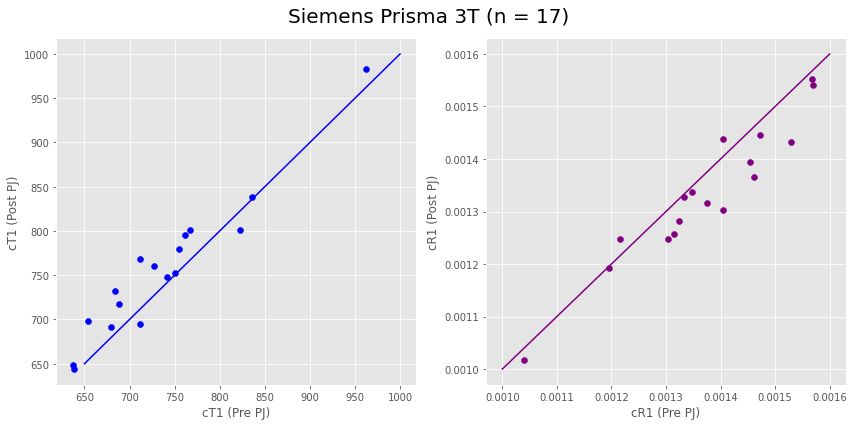

In [ ]:
# fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
# fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)
# ax[0].scatter(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"], color = 'blue')
# ax[0].plot( [650,1000], [650,1000] , color = 'blue')
# ax[0].set_xlabel('cT1 (Pre PJ)')
# ax[0].set_ylabel('cT1 (Post PJ)')


# ax[1].scatter(PA["cR1 median (Pre PJ)"], PA["cR1 median (Post PJ)"], color = 'purple')
# ax[1].plot( [0.0010, 0.0016], [0.0010, 0.0016] , color = 'purple')
# ax[1].set_xlabel('cR1 (Pre PJ)')
# ax[1].set_ylabel('cR1 (Post PJ)')

# plt.tight_layout()

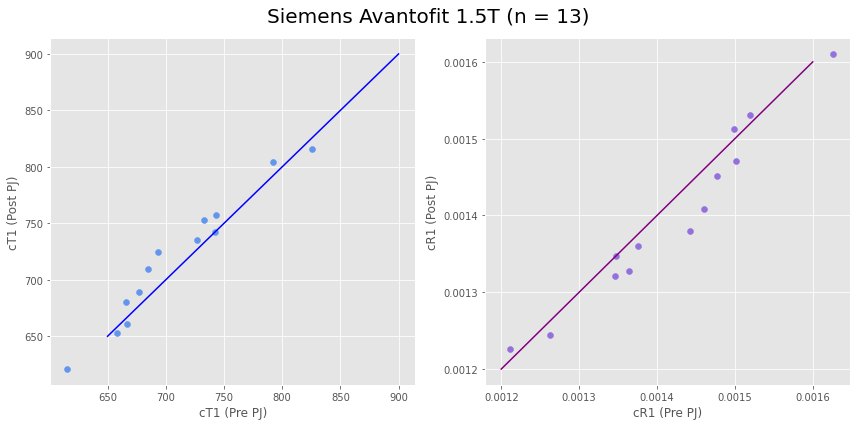

In [ ]:
# fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
# fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)
# ax[0].scatter(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"], color = 'cornflowerblue')
# ax[0].plot( [650,900], [650,900] , color = 'blue')
# ax[0].set_xlabel('cT1 (Pre PJ)')
# ax[0].set_ylabel('cT1 (Post PJ)')


# ax[1].scatter(AV["cR1 median (Pre PJ)"], AV["cR1 median (Post PJ)"], color = 'mediumpurple')
# ax[1].plot( [0.0012, 0.0016], [0.0012, 0.0016] , color = 'purple')
# ax[1].set_xlabel('cR1 (Pre PJ)')
# ax[1].set_ylabel('cR1 (Post PJ)')

# plt.tight_layout()

Text(0, 0.5, 'cT1 Pre - cT1 Post')

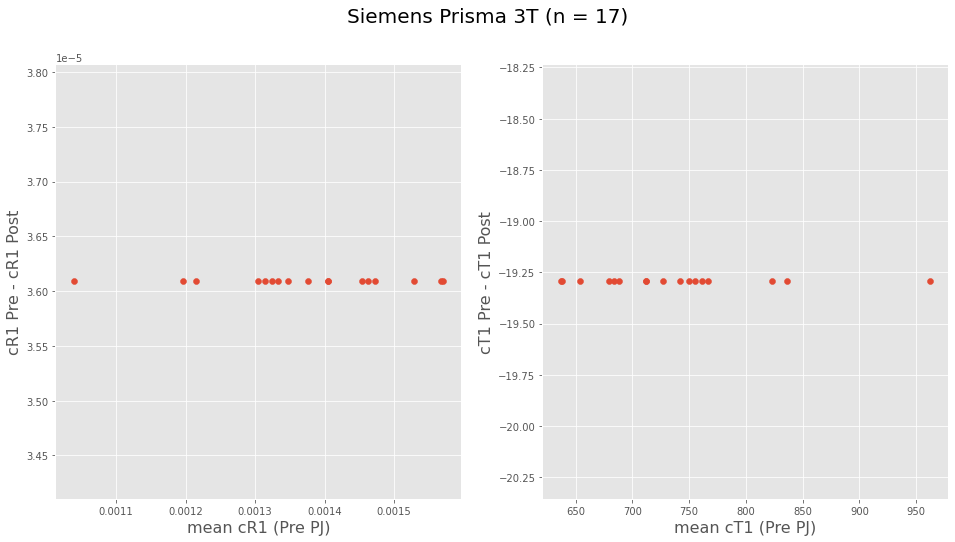

In [ ]:
# # Delta R1 against native R1
# PA['delta cR1'] = PA["cR1 median (Pre PJ)"]- PA["cR1 median (Post PJ)"]
# PA['delta cT1'] = PA["cT1 median (Pre PJ)"]- PA["cT1 median (Post PJ)"]
# PA['meandiff_cR1'] = np.mean(PA['delta cR1'])
# PA['meandiff_cT1'] = np.mean(PA['delta cT1'])

# fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
# fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

# axes[0].scatter(PA["cR1 median (Pre PJ)"], PA['meandiff_cR1'])
# axes[0].set_xlabel('mean cR1 (Pre PJ)',  fontsize = 16)
# axes[0].set_ylabel("cR1 Pre - cR1 Post", fontsize = 16)

# axes[1].scatter(PA["cT1 median (Pre PJ)"], PA['meandiff_cT1'])
# axes[1].set_xlabel('mean cT1 (Pre PJ)',  fontsize = 16)
# axes[1].set_ylabel("cT1 Pre - cT1 Post", fontsize = 16)

Text(0, 0.5, 'cT1 Pre - cT1 Post')

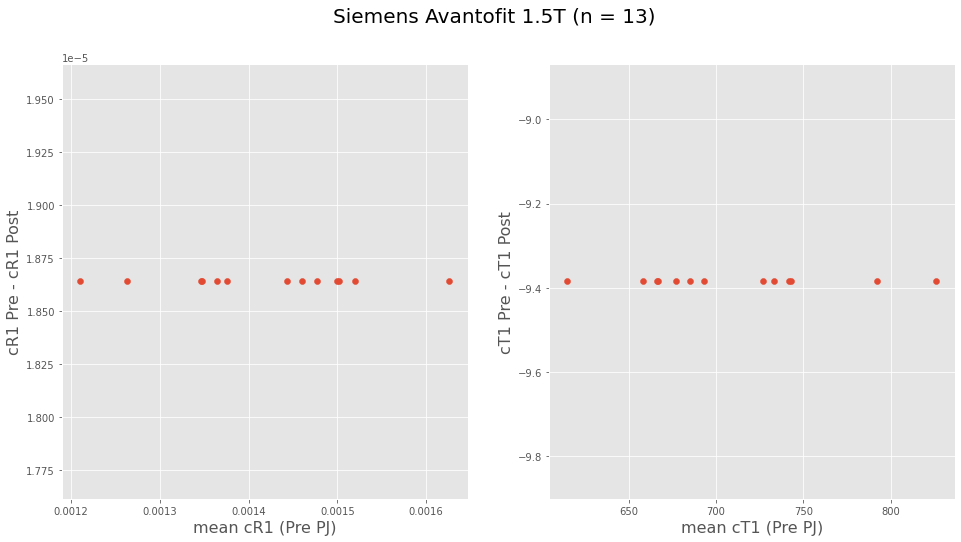

In [ ]:
# # Delta R1 against native R1
# AV['delta cR1'] = AV["cR1 median (Pre PJ)"]- AV["cR1 median (Post PJ)"]
# AV['delta cT1'] = AV["cT1 median (Pre PJ)"]- AV["cT1 median (Post PJ)"]
# AV['meandiff_cR1'] = np.mean(AV['delta cR1'])
# AV['meandiff_cT1'] = np.mean(AV['delta cT1'])

# fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
# fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

# axes[0].scatter(AV["cR1 median (Pre PJ)"], AV['meandiff_cR1'])
# axes[0].set_xlabel('mean cR1 (Pre PJ)',  fontsize = 16)
# axes[0].set_ylabel("cR1 Pre - cR1 Post", fontsize = 16)

# axes[1].scatter(AV["cT1 median (Pre PJ)"], AV['meandiff_cT1'])
# axes[1].set_xlabel('mean cT1 (Pre PJ)',  fontsize = 16)
# axes[1].set_ylabel("cT1 Pre - cT1 Post", fontsize = 16)